#Importando bibliotecas e conhecendo o dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
casas = pd.read_csv('/content/drive/MyDrive/Estudos Ciência de Dados/Datasets/casas.csv', sep = ';')
casas

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374
...,...,...,...,...
4995,735000,70,0.479357,0.752891
4996,900000,128,8.594487,0.370170
4997,800000,70,0.253138,0.421407
4998,190000,55,8.945226,0.680963


Area --> Área do imóvel em metros quadrados m²

Valor --> Valor do imóvel em reais.

Dist_Praia --> Distância do imovel à praia mais próxima

Dist_Farmacia --> Distância do imóvel a farmácia mais próxima.

In [ ]:
casas.shape

(5000, 4)

#Análise descriptiva dos dados

In [ ]:
casas.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


Text(0.5, 1.0, 'Distribuição Farmácia')

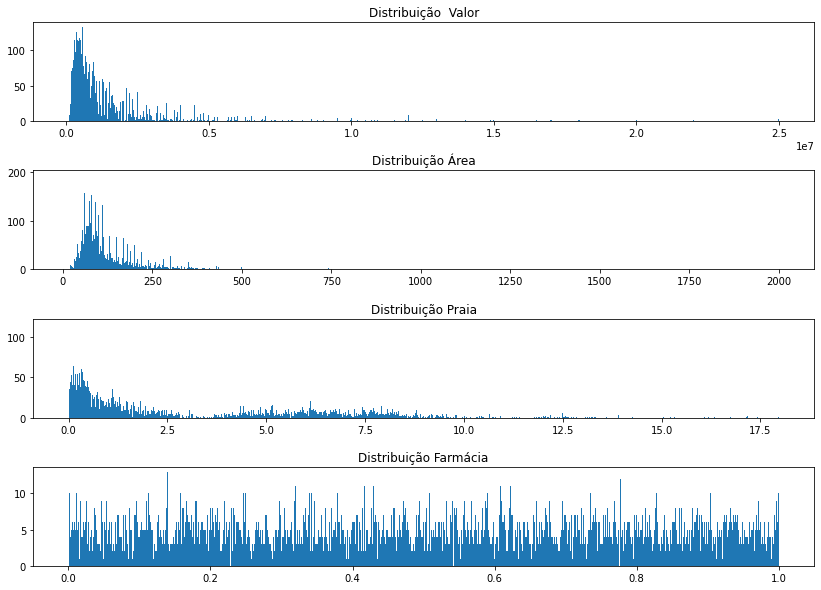

In [ ]:
fig, graficos = plt.subplots(4, figsize = (14,10))
plt.subplots_adjust(wspace = 0.35, hspace = 0.5)

graficos[0].hist(casas.Valor, bins = 1000)
graficos[1].hist(casas.Area, bins = 1000)
graficos[2].hist(casas.Dist_Praia, bins = 1000)
graficos[3].hist(casas.Dist_Farmacia, bins = 1000)

graficos[0].set_title('Distribuição  Valor')
graficos[1].set_title('Distribuição Área')
graficos[2].set_title('Distribuição Praia')
graficos[3].set_title('Distribuição Farmácia')

Aqui percebemos que nenhuma das nossas colunas inclusive a variável dependente Y - Valor - segue uma distribuição normal.

Esse tipo de distribuição - Asimétrica à Direta - é bastante comum para o tipo de variável que estamos analisando - Valor de imoveis - pois existem muitos imoveis que estão numa faixa de preço 'mediano' e pouquissímos imóveis de luxo comn valores altos. O mesmo raciocínio se aplica a variável Area, exietem poquissímos imóveis com área grande.

Vamos ter que fazer um tratamento desses dados, para tentar ajustar ao máximo nossa distribuição a ditribuição normal, Pois como veremos mais adiante com mais detalhes, se a distribuição das variáveis independentes Xs não tiverem distribuição normal ou próxima a normal, isso quer dizer que a distribuição dos resíduos também não seguirá uma distribuição normal!

Um dos meio de ver se as previssões que nossa reta de regressão modelada vão ser boas ou não, é partir da distribuição dos resíduos! Se a distribuição dos resíduos tiver o formato de sino, isso quer dizer que a acurácia do nosso modelo de regressão é alta!



#Transformando Km para metros

Benévolo, acabamos de ver que nenhuma das nossas variáveis segue a distribuição normal. Isso indica que deveremos fazer uma transformação/ajuste dos nossos dados para que ela se ajuste a distribuição normal e com isso, nosso modelo de regressão consiga gerar boas previssões.

Como você verá mais adiante, uma técnica bastante manjada para ajustar dados que não seguem a dist. normal, para que eles sigam uma dist. normal, é aplicar log em todo o dataset! Como veremos isso diminui a disperção dos dados, fazendo que ela se aproxime a dist. normal.

 O grande problema dessa técnica é que ele só consegue ser bem aplicada se os valores estiverem num range maior que 1! Veja a distribuição de valores para as variáveis "Dist_Farmacia" e "Dist_Praia", o range dos valores assumidos estão em valores menores que 1! Isso se deve ao fato de eles serem medidos em kilómetros!

 Podemos arrumar isso, transformando kilómetros para metros! De fato, veja que essa transfromação não muda em nada a compreensão principal do campo, isto é, 0,15km da praia é a mesma coisa que 150 metros da praia!

 Nesse sentido vamos fazer a transformação, para que, quando fizermos a transformação logaritimica, ela consiga fazer isso da melhor forma:

In [ ]:
casas.Dist_Farmacia = casas.Dist_Farmacia*1000
casas.Dist_Praia = casas.Dist_Praia*1000
casas

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,240.925428,793.637
1,900000,208,904.135764,134.494
2,2550000,170,59.525280,423.318
3,550000,100,2883.180730,525.064
4,2200000,164,239.757554,192.374
...,...,...,...,...
4995,735000,70,479.357396,752.891
4996,900000,128,8594.487125,370.170
4997,800000,70,253.138238,421.407
4998,190000,55,8945.226049,680.963


#Criando dataset com a retirada de outliers

Benévolo.. Aqui temos que aprender que, em muittas ocasiões não podemos retirar esses outliers!! Pois eles guardam informações importantes, por exemplo... é completamente esperado que a variável 'Valor' tenha esse tipo de distribuição Assimétrica a Direita com muitos outliers, pois existem muito poucos imóveis de luxo com grande valor. O que vamos fazer neste estudo de caso, é dividir nosso estudo de regressão linear em dois modelos:

Um que vamos cortar os outliers

Outro que não vamos cortar os outliers e vamos fazer um tratamento diferenciado.

##Cortando outliers

Vamos visualizar graficamente onde estao os outliers de cada coluna com o box plot

Text(0.5, 1.0, 'Distribuição Área')

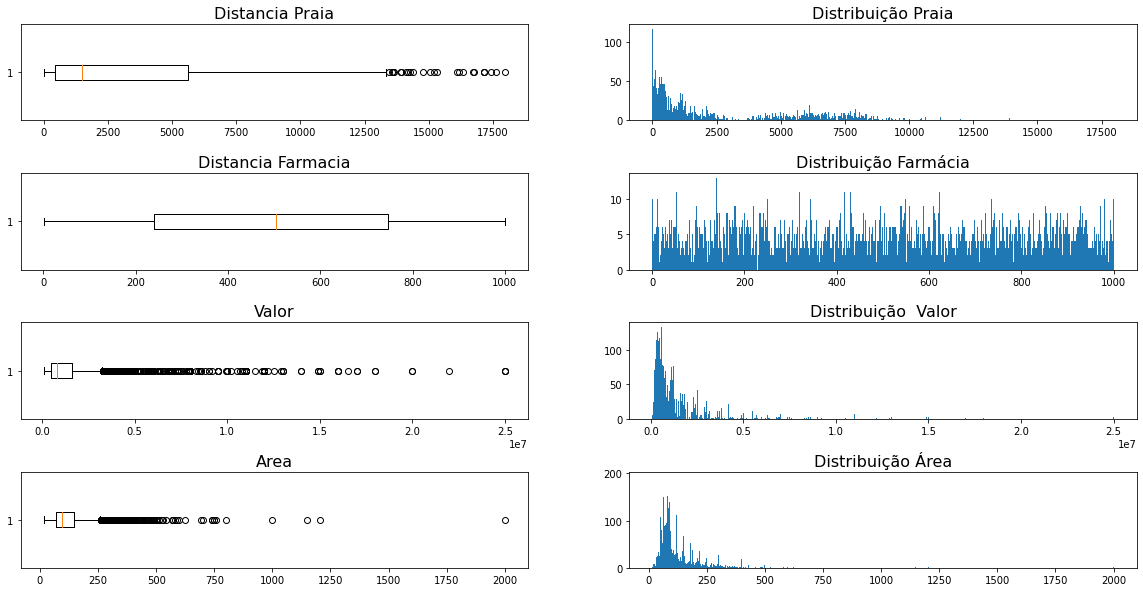

In [ ]:
fig, graficos = plt.subplots(4, 2, figsize = (20,10))
plt.subplots_adjust(wspace = 0.20, hspace = 0.55)

graficos[0][0].boxplot(data = casas, x = 'Dist_Praia', vert=False)
graficos[0][0].set_title('Distancia Praia', fontsize = 16)
graficos[0][1].set_title('Distribuição Praia', fontsize = 16)
graficos[0][1].hist(casas.Dist_Praia, bins = 1000)


graficos[1][0].boxplot(data = casas, x = 'Dist_Farmacia', vert=False)
graficos[1][0].set_title('Distancia Farmacia', fontsize = 16)
graficos[1][1].set_title('Distribuição Farmácia', fontsize = 16)
graficos[1][1].hist(casas.Dist_Farmacia, bins = 1000)

graficos[2][0].boxplot(data = casas, x = 'Valor', vert=False)
graficos[2][0].set_title('Valor', fontsize = 16)
graficos[2][1].hist(casas.Valor, bins = 1000)
graficos[2][1].set_title('Distribuição  Valor', fontsize = 16)


graficos[3][0].boxplot(data = casas, x = 'Area', vert=False)
graficos[3][0].set_title('Area', fontsize = 16)
graficos[3][1].hist(casas.Area, bins = 1000)
graficos[3][1].set_title('Distribuição Área', fontsize = 16)


Aqui podemos ver como os boxes plots refletem a Simetria ou Assimetria das ditribições.

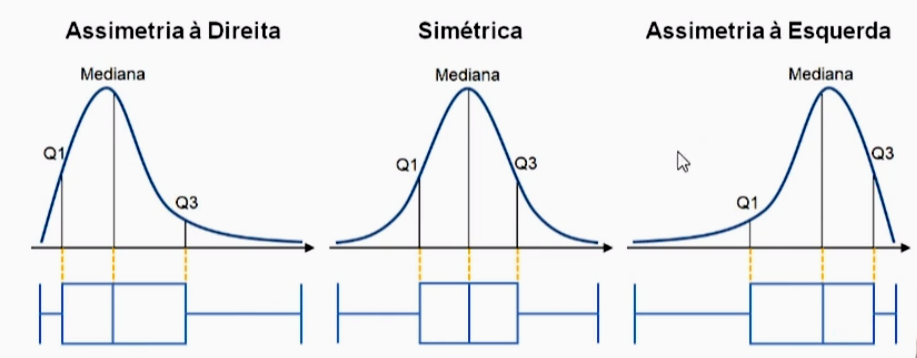

Aqui vemos que, todos as colunas tem outliers, menos a de 'Dist_Farmacia'.
Aqui sabemos que:

'Valor', 'Distância Praia', 'Area' tem outliers depois do seus respectivos valores máximos.

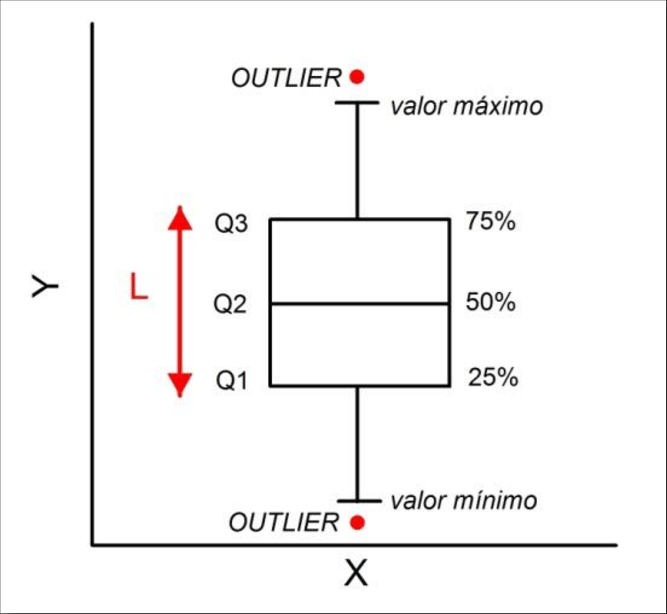

agora vamos saber quais são os valores exatos desses máximos de cada coluna, para que possamos fazer o corte desses outliers

In [ ]:
casas.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3021.920081,497.159844
std,1.883269e+06,90.536969,3170.933432,291.355255
min,7.500000e+04,16.000000,0.000000,0.331000
25%,4.600000e+05,70.000000,438.416982,238.639500
50%,8.200000e+05,93.000000,1476.957662,503.260000
75%,1.590000e+06,146.000000,5605.378934,747.736750
max,2.500000e+07,2000.000000,17962.941630,999.987000


O maximo que aparece nesta tabela não é o máximo que falamos no box plot. O máximo do box plot é calculado com a Amplitude Interquartil.

Releembrando, a Amplitude interquartil, é calculada como sendo a diferença entre o 3ªquartil e o 1ªquartil:

Amplitude Interquartil = 3ªQ - 1ªQ

Essa amplitude são os bigodes do nosso box plot, ele delimita quais são os valores que serão considerados outliers, que são os valores que estiverem a uma distância maior que a Amplitude Interquatil do 3ªQ ou 1ªQ.

Sabendo disso, podemos cortar nossos outliers com contas de padarias:

Vamos usar o método 'quantile' que recebe como parâmetro o quartil em porcentagem que queremos:

In [ ]:
casas.Area.quantile(.25)

70.0

In [ ]:
casas.Area.quantile(.75)

146.0

In [ ]:
amplitude_interquartil = casas.Area.quantile(.75) - casas.Area.quantile(.25)
amplitude_interquartil

76.0

In [ ]:
limite_superior = casas.Area.quantile(.75) + amplitude_interquartil
limite_superior

222.0

Ou seja, qualquer valor acima de 222 na coluna Area, é considerado um outlier e deve ser cortado:

In [ ]:
casas_sem_outliers = casas[ casas['Area'] <= limite_superior ]
casas_sem_outliers.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
1,900000,208,904.135764,134.494
2,2550000,170,59.525280,423.318
3,550000,100,2883.180730,525.064
4,2200000,164,239.757554,192.374
5,1449993,143,5119.767035,43.398


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


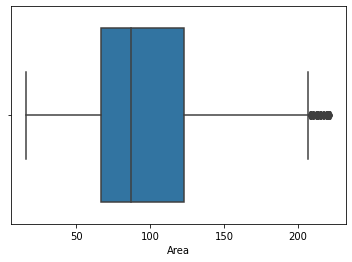

In [ ]:
sns.boxplot(casas_sem_outliers.Area)

Conseguimos amenizar muito a situção que tinhamos com os outliers, vamos replicar o mesmo processo para as demais colunas:

In [ ]:
amplitude_interquartil =casas_sem_outliers.Dist_Praia.quantile(.75) - casas_sem_outliers.Dist_Praia.quantile(.25)
limite_supeior = casas_sem_outliers.Dist_Praia.quantile(.75) + amplitude_interquartil
casas_sem_outliers = casas_sem_outliers[ casas_sem_outliers['Dist_Praia'] <= limite_supeior ]

amplitude_interquartil = casas_sem_outliers.Valor.quantile(.75) - casas_sem_outliers.Valor.quantile(.25)
limite_supeior = casas_sem_outliers.Valor.quantile(.75) + amplitude_interquartil
casas_sem_outliers = casas_sem_outliers[ casas_sem_outliers['Valor'] <= limite_supeior ]

Vamos replotar os boxes plot e os gráficos de distribuição de cada variável

Text(0.5, 1.0, 'Distribuição Área')

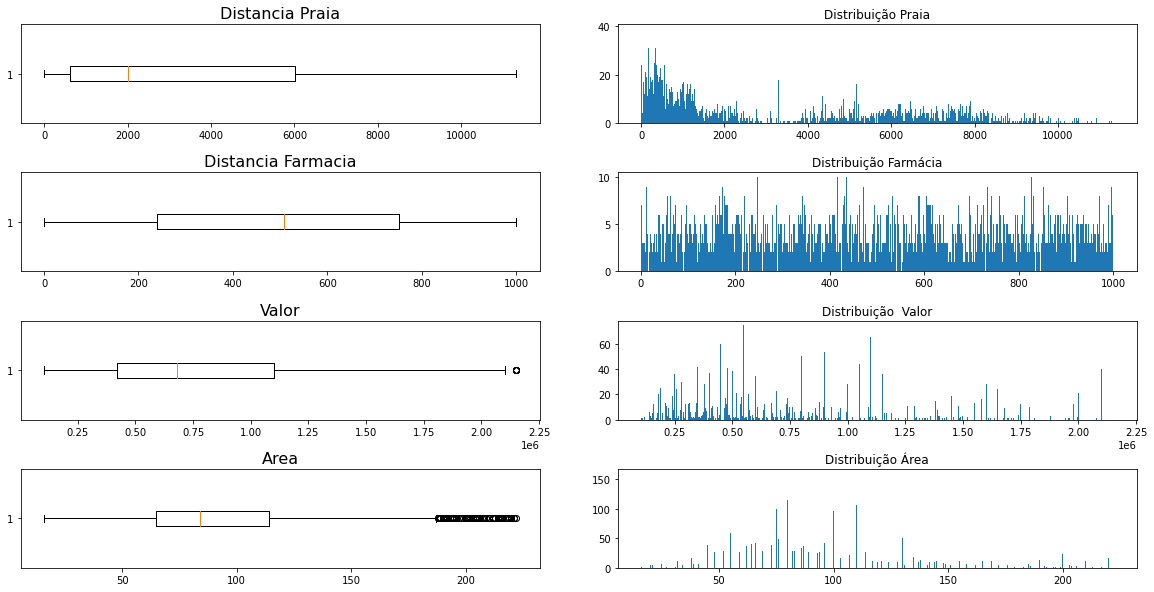

In [ ]:
fig, graficos = plt.subplots(4, 2, figsize = (20,10))
plt.subplots_adjust(wspace = 0.15, hspace = 0.5)

graficos[0][0].boxplot(data = casas_sem_outliers, x = 'Dist_Praia', vert=False)
graficos[0][0].set_title('Distancia Praia', fontsize = 16)
graficos[0][1].set_title('Distribuição Praia')
graficos[0][1].hist(casas_sem_outliers.Dist_Praia, bins = 1000)


graficos[1][0].boxplot(data = casas_sem_outliers, x = 'Dist_Farmacia', vert=False)
graficos[1][0].set_title('Distancia Farmacia', fontsize = 16)
graficos[1][1].set_title('Distribuição Farmácia')
graficos[1][1].hist(casas_sem_outliers.Dist_Farmacia, bins = 1000)

graficos[2][0].boxplot(data = casas_sem_outliers, x = 'Valor', vert=False)
graficos[2][0].set_title('Valor', fontsize = 16)
graficos[2][1].hist(casas_sem_outliers.Valor, bins = 1000)
graficos[2][1].set_title('Distribuição  Valor')


graficos[3][0].boxplot(data = casas_sem_outliers, x = 'Area', vert=False)
graficos[3][0].set_title('Area', fontsize = 16)
graficos[3][1].hist(casas_sem_outliers.Area, bins = 1000)
graficos[3][1].set_title('Distribuição Área')

nossos boxplots estão com uma cara mais amiguavel, a distrubuição não está próximo a uma distribuição normal... mas está bem melhor do que estava antes.

In [ ]:
casas_sem_outliers.shape

(4006, 4)

Perdemos 1000 linhas ... um número significativo para nosso modelo... vamos fazer o teste de criar o modelo sem fazer esse tratamento de outliers para comparar os dois e vermos, se os outliers realmente são pontos negativos nos modelos de regressão linear

#Matriz de Correlação

##Matriz de correlação Modelo Sem outliers

Montamos a matriz de correlação usando o método .corr()

In [ ]:
casas_sem_outliers.corr()

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000000,0.650749,-0.549491,-0.024597
Area,0.650749,1.000000,-0.171095,-0.025979
Dist_Praia,-0.549491,-0.171095,1.000000,0.018821
Dist_Farmacia,-0.024597,-0.025979,0.018821,1.000000


Mas também podemos ver ela de forma mais gráfica com o seaborn, utilizando o sns.heatmap() (heatmap = mapa de calor).

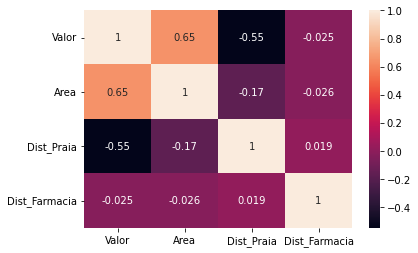

In [ ]:
sns.heatmap(casas_sem_outliers.corr(),annot=True)

Com o heatmap() de correlação vemos que existe uma correlação forte entre:

Valor e Area de +65%: Logo se a área aumenta, o preço aumenta e quando o preço abaixa a área tembém abaixa.

Valor e Distância da praia -55%: Logo, se a distância da praia diminui, o preço aumenta e quando a distância aumenta o valor diminui.


A relação entre Valor e Distância da Farmacia mais próxima é muito baixa. Veja que a correlação linear entre Área de Distância da praia é de -17%, relativamente baixa, logo podemos suar os dois no modelo. Lembrando que, em modelos de regressão linear, a adição de mais variáveis explicativas no modelo nunca vai abaixar a acurácia dele, no pior dos casos ele continua o mesmo.


##Matriz de Correlação Modelo Com Outliers

In [ ]:
casas.corr()


,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Praia,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


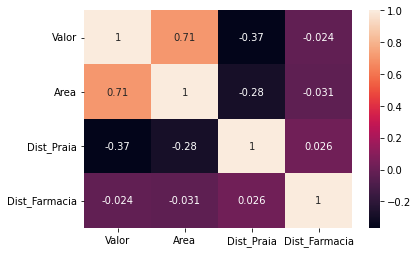

In [ ]:
sns.heatmap(casas.corr(),annot=True)

Vemos aqui que, temos yma correlção maior entre Valor e Area quando não tiramos os outliers, mas... Perdemos correlação entre as variávies Valor e Distância Praia:

Com Outliers

Distância Praia e Valor : -37%

Área e Valor: 71%

#Graficos de Dispersão com as variáveis explicativas

##Modelo com outliers

Text(0.5, 0.98, "Dispersão entre 'Valor' x  Variáveis explicativas")

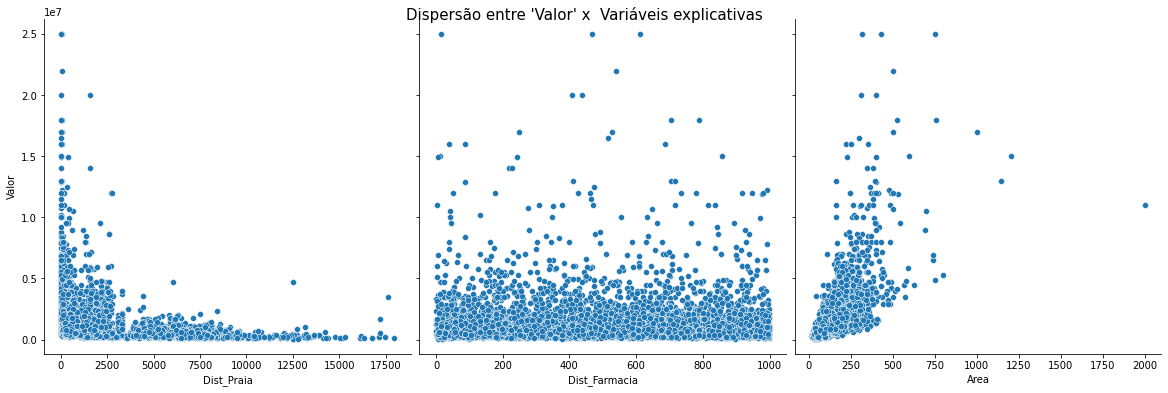

In [ ]:
grafico_pontos_com_outliers = sns.pairplot(casas ,y_vars="Valor", x_vars =["Dist_Praia", "Dist_Farmacia", "Area"], height = 5.5)
grafico_pontos_com_outliers.fig.suptitle("Dispersão entre 'Valor' x  Variáveis explicativas", fontsize=15)

No olho já conseguimos perceber que não há um correlação linear clara entre a variável independente 'Valor' e as outras variáveis explicativas.

O gráfico com 'Dist_Farmacia' é impossível traçar alguma coisa, o que bate com a matriz de correlação que plotamos.

O grafico com Área é preocupante, pois ele tem um aumento que parece mais exponencial que linear conforme os valores de X's aumentam, isso não conseguimos ver com a matriz de correlação!!!

O gráfico com ''Dist_Praia' é confuso, não dá para traçar um linha no ao olho nu, essa informação também não dá para indentificar somente com a matriz de correlação.

Vamos tentar plotar uma linha de regressão linear:

Text(0.5, 0.98, "Dispersão entre 'Valor' x  Variáveis explicativas")

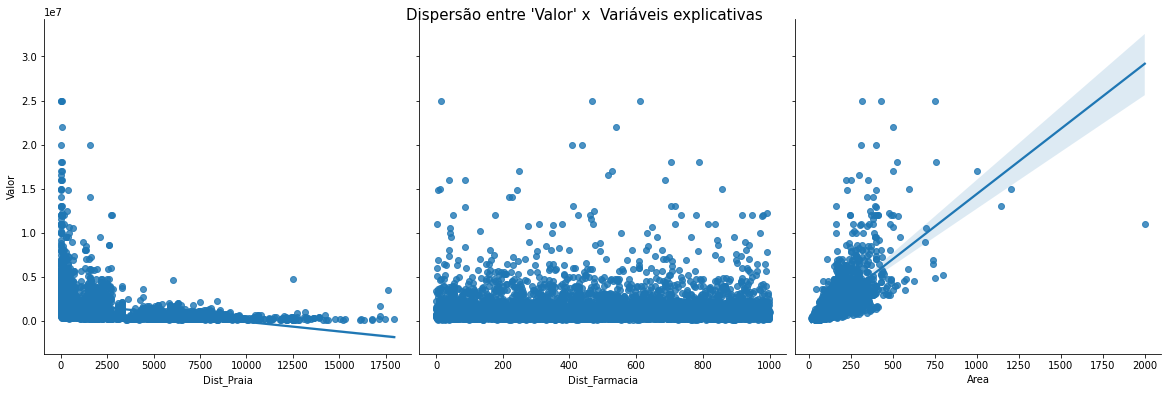

In [ ]:
grafico_pontos_com_outliers = sns.pairplot(casas ,y_vars="Valor", x_vars =["Dist_Praia", "Dist_Farmacia", "Area"], height = 5.5, kind='reg')
grafico_pontos_com_outliers.fig.suptitle("Dispersão entre 'Valor' x  Variáveis explicativas", fontsize=15)

Aqui vemos que a reta de regressão linear para a variável Área está muito dispersa, a reta com a variável Dist_Farmacia nem vemos!!! E a reta com Distância Praia só faz sentido para valores grandes de Dist_Praia, pois veja que quando a distância é baixa, temos uma concentração enorme de pontos

##Modelo sem outliers

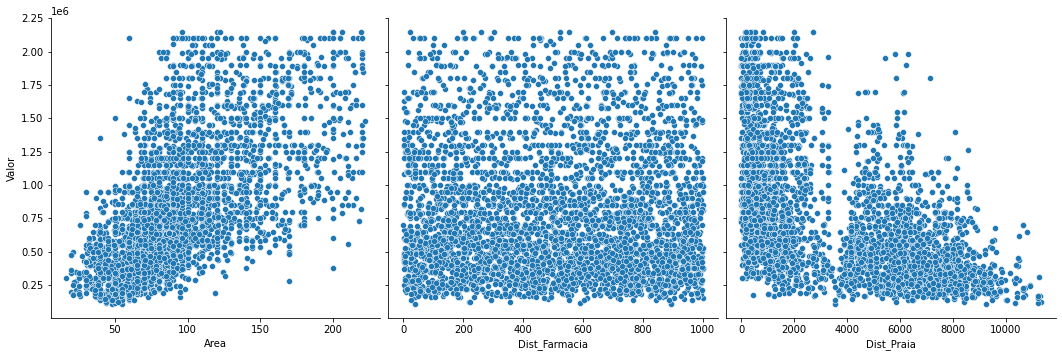

In [ ]:
grafico_pontos_sem_outliers = sns.pairplot(casas_sem_outliers, y_vars = 'Valor', x_vars = ['Area', 'Dist_Farmacia', 'Dist_Praia'], height = 5)

Aqui vemos que os gráficos de Area e Dist Praia estão muito melhores, o Gráfico de Area é possível traçarmos um linha ao olho nú, já o gráfico de Dist_Praia ainda está com os pontos exparsos, mas conseguimos traçar uma linha de regressão com mais facildade.

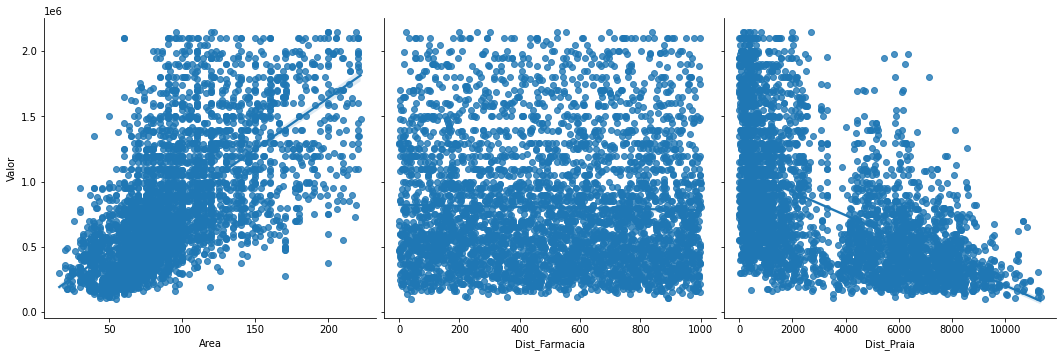

In [ ]:
grafico_pontos_sem_outliers = sns.pairplot(casas_sem_outliers, y_vars = 'Valor', x_vars = ['Area', 'Dist_Farmacia', 'Dist_Praia'], kind = 'reg', height = 5)


O gráfico de Dist Farmacia ainda segue muito esparço, o que mostra que ele não tem muita correlação com a variável dependente 'Valor'

#Transformação logaritma dos dados

Benévolo, o que vamos fazer agora é aplicar uma tecnica de normalização (fazer que os dados se aproximem a distrbuição normal). Essa tecnica é transformar os dados decimais na base logaritmica na base 10. Ao aplicarmos o número decimal ao logaritmo de base 10, diminuimos muito o seu valor bruto.

Veja, o valor 10000 pode ser rescrito como sendo log(1000) = 4 .... veja a diferença entre os valores brutos: 10000 - 4

Note também que, não existe 2 valores decimais tais que:

a != b : log(a) = log(b) --> Impossível

a != b : lob(a) != log(b) --> Correto sempre

se

log(a) = log(b) : a = b --> Correto

Logo, quero que percebas que, podemos sim aplicar o log em todos os valores do nosso dataset, pois cada um valor único vai gerar um logo único e diferente dos demais.



***MAS, PORQUE QUEREMOS QUE NOSSAS VARIÁVEIS INDEPENDENTES Xs E NOSSA VARIÁVEL DEPEDENTE Y SIGAM UMA DISTRIBUIÇÃO NORMAL? ***

Benévolo, isso se dá pelo simples fato de que, quando mais próxima do formato de sino nossas distribuições tiverem, melhor será o valor dos coeficientes da reta de regressão, isso é, melhor será o valor do intercepto e melhor será o valor dos coeficientes. Quando eu digo "melhor" quero dizer que os valores assumidos por eles, na reta de regressão nos retornarão valores mais proximos aos reais!

A lógica da transformação logaritmica é simples:

- Transformo todos meus dados na base log, e com isso deixo eles com uma distribuição mais próxima a normal.

- Com uma distribuição mais próxima a normal, os valores calculados para os coeficientes da reta de regressão serão mais precisos, logo a previssão gerada pela equação de regressão linear será mais precisa.

- Mas devemos nos ater que, essa previsão será dada em Log, logo devemos "desconverter" esses valores, isto é, fazer a operação inversa para obter o valor sem log. Isso só é possível por conta de propriedade que acabamos de discutir, que é:

  a != b : log(a) = log(b) --> Impossível

- Como você verá nos gráficos a seguir, quando aplicamos log a valores escalares, estamos reduzindo seu valor. Veja, temos os números [2,200,2000,20000], existe muita diferença entre eles, mas quando aplicamos log em todos temos os seguinte resultado respectivamente: [0.3, 2.3, 3,3, 4,3]. Veja que a diferença diminuiu muito! É por isso que aplicamos log em dados que não tem distribuição normal! Isto é, em dados que são exparsos! Pois o log vai reunir todos em um range menor!

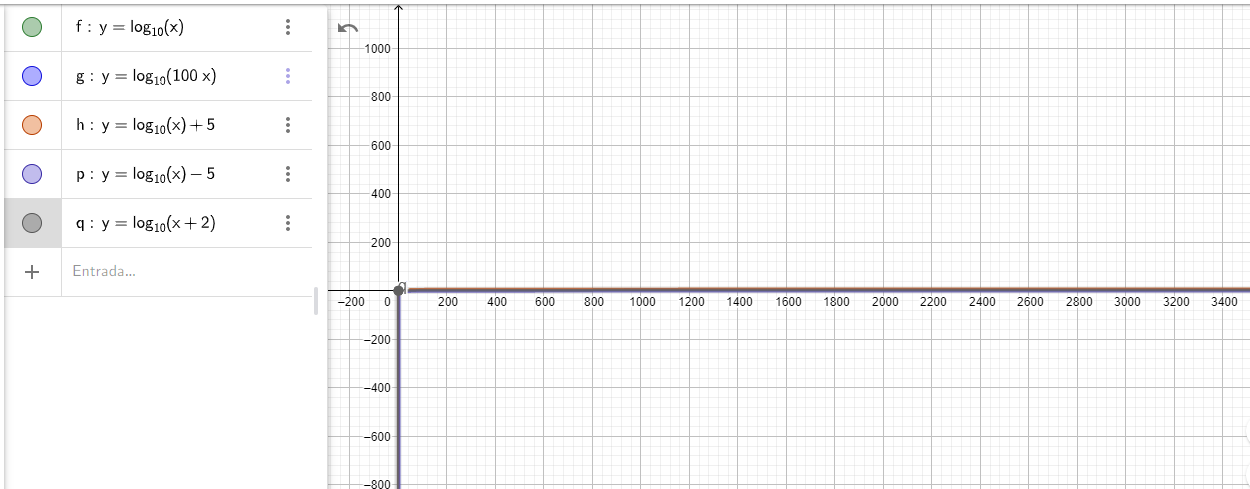

Como comentado, note que os valores de Y são baixos!! Mesmo quando os valores de X aumentam os valores de Y tendem a se estabilizar em uma reta paralela ao eixo X!!! Isto é de novo, veja que para valores de X > 1, o range para log(x) é muito pequeno! No nosso caso, estamos lidando com valores maiores que 1, os valores de casas é maior que 1, o mesmo ocorre para os valores de distâncias da casa para a praia e framácia e área

##Log(0) = não existe!!


Benévolo, cuidado quando formos aplicar dos dados do dataset ao log, pois o log(0) não existe, pois o log(0) = x, quer dizer que, 10^x = 0.... X não existe!!  

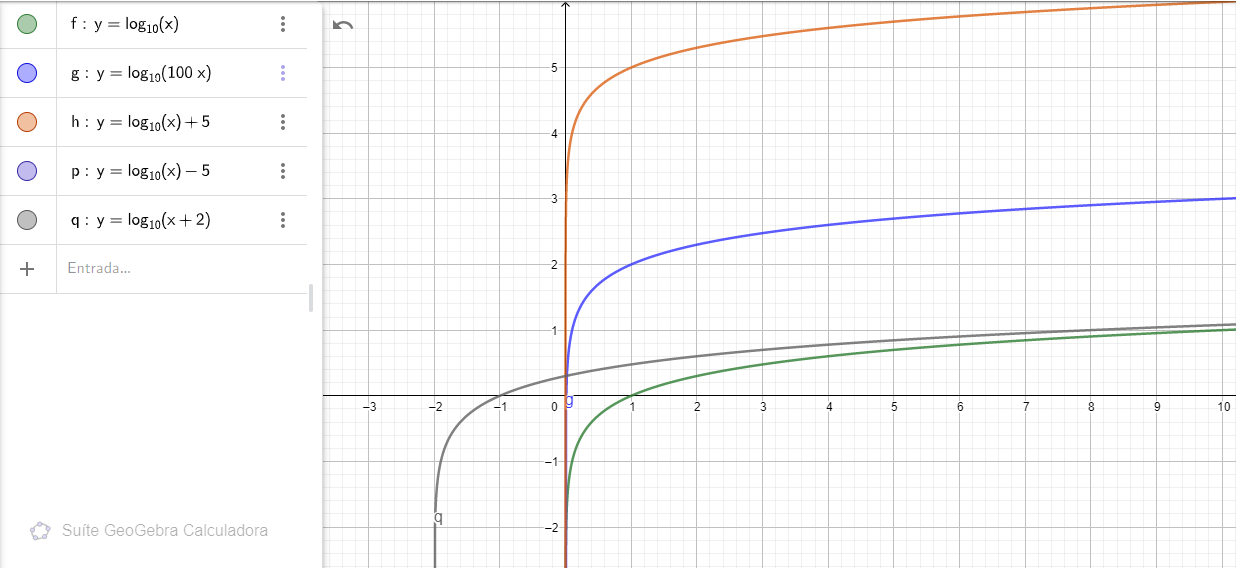

benévolo veja que o grafico de logaritmo, nunca o valor do logaritmando (log(x) é 'x') nunca pode ser igual à zero!! Até no caso onde temos log(x+2), veja que x+2 > 0!!!!

##Logaritmo no modelo com outliers

Benévolo, vamos adicionar em 1, os valores dentro dos parenteses np.log(), ou seja, vamo adiocinar em 1 os valores do nosso dataset para evitar os casos onde o valor dentro do dataset é 0, logo: 0 + 1 = 1, pronto.. evitamos o log(0).

Como estamos adiociando em todos os valor, o que etamos fazendo é locomovendo todos os pontos do gráfico para a esquerda:


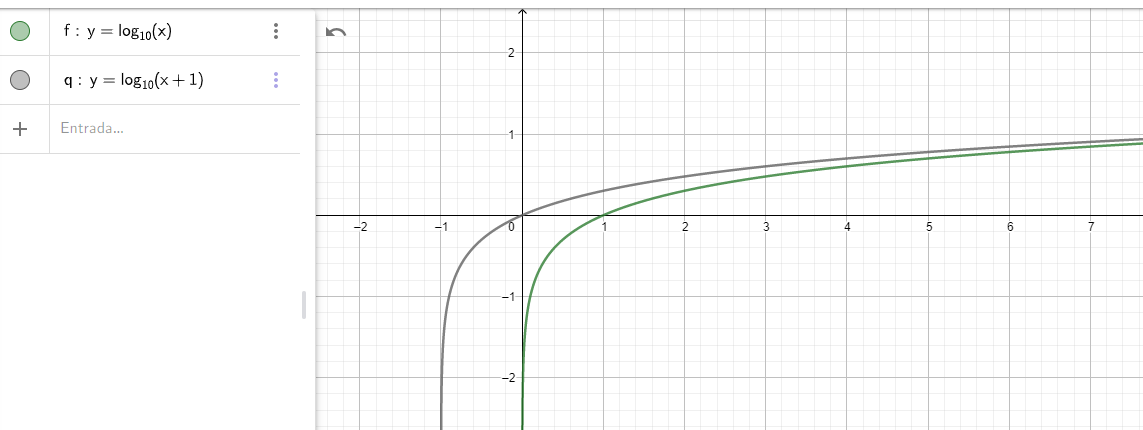

In [ ]:
casas['Log_Valor'] = np.log(casas['Valor'] + 1)
casas['Log_Area'] = np.log(casas['Area'] + 1)
casas['Log_Dist_Farmacia'] = np.log(casas['Dist_Farmacia'] + 1)
casas['Log_Dist_Praia'] = np.log(casas['Dist_Praia'] + 1)

In [ ]:
casas.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,Log_Valor,Log_Area,Log_Dist_Farmacia,Log_Dist_Praia
0,4600000,280,240.925428,793.637,15.341567,5.638355,6.677885,5.488630
1,900000,208,904.135764,134.494,13.710151,5.342334,4.908927,6.808085
2,2550000,170,59.525280,423.318,14.751604,5.141664,6.050483,4.103061
3,550000,100,2883.180730,525.064,13.217675,4.615121,6.265423,7.966996
4,2200000,164,239.757554,192.374,14.603968,5.105945,5.264626,5.483790


vamos plotar o gráfico de dispersão do dataset com os outliers, mas agora com os valor logatimos dos dados:

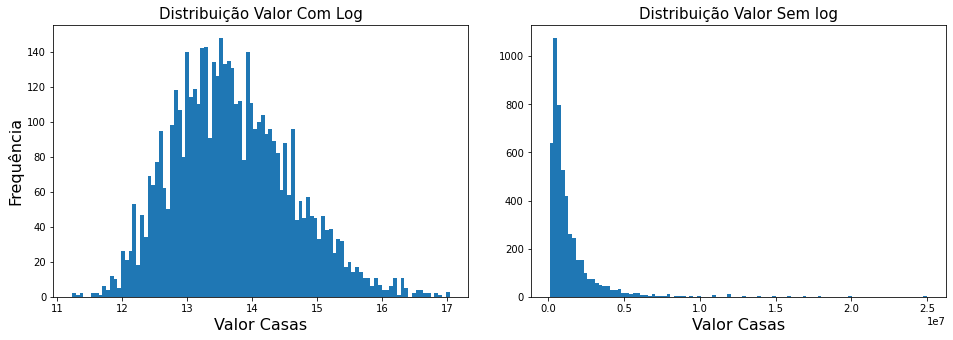

In [ ]:
fig, graficos = plt.subplots(1,2, figsize= (10,5))
plt.subplots_adjust(wspace = 0.15, hspace = 0.5)

graficos[0].hist(casas['Log_Valor'], bins = 100)
graficos[0].set_title('Distribuição Valor Com Log', fontsize = 15)
graficos[0].set_xlabel("Valor Casas", fontsize = 16)
graficos[0].set_ylabel("Frequência", fontsize = 16)
graficos[0].figure.set_size_inches(16,5)

graficos[1].hist(casas['Valor'], bins = 100)
graficos[1].set_title('Distribuição Valor Sem log', fontsize = 15)
graficos[1].set_xlabel("Valor Casas", fontsize = 16)
graficos[1].figure.set_size_inches(16,5)



Benévolo, note a diferença entre os valores no eixo x, o que tinhamos na forma original tinha um range muito alto, note que ele vai de 0 até 2.5 * 10 ** 7. Compare com o novos valores agora transformados para log, o range deles vai de 11 até 17! Isso faz com que os valores se concentrem em um renge muito menor, por conseguência ajuda a normalizar os dados!

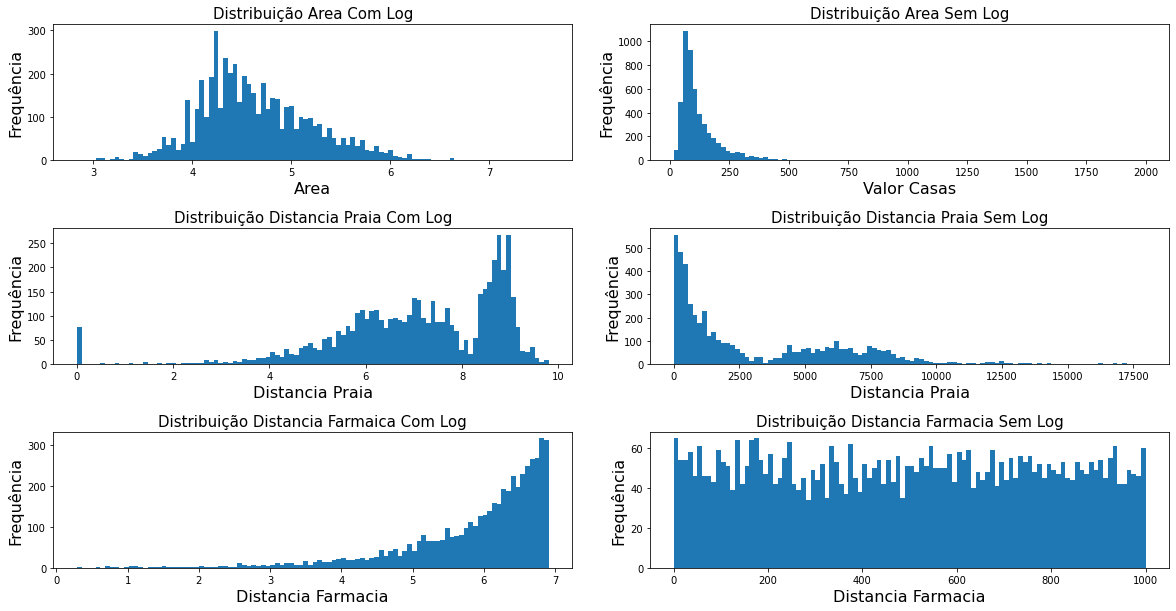

In [ ]:
fig, graficos = plt.subplots(3,2, figsize= (50,30))
plt.subplots_adjust(wspace = 0.15, hspace = 0.5)

graficos[0][0].hist(casas['Log_Area'], bins = 100)
graficos[0][0].set_title('Distribuição Area Com Log', fontsize = 15)
graficos[0][0].set_xlabel("Area", fontsize = 16)
graficos[0][0].set_ylabel("Frequência", fontsize = 16)
graficos[0][0].figure.set_size_inches(20,10)

graficos[0][1].hist(casas['Area'], bins = 100)
graficos[0][1].set_title('Distribuição Area Sem Log', fontsize = 15)
graficos[0][1].set_xlabel("Valor Casas", fontsize = 16)
graficos[0][1].set_ylabel("Frequência", fontsize = 16)
graficos[0][1].figure.set_size_inches(20,10)

graficos[1][0].hist(casas['Log_Dist_Praia'], bins = 100)
graficos[1][0].set_title('Distribuição Distancia Praia Com Log', fontsize = 15)
graficos[1][0].set_xlabel("Distancia Praia", fontsize = 16)
graficos[1][0].set_ylabel("Frequência", fontsize = 16)
graficos[1][0].figure.set_size_inches(20,10)

graficos[1][1].hist(casas['Dist_Praia'], bins = 100)
graficos[1][1].set_title('Distribuição Distancia Praia Sem Log', fontsize = 15)
graficos[1][1].set_xlabel("Distancia Praia", fontsize = 16)
graficos[1][1].set_ylabel("Frequência", fontsize = 16)
graficos[1][1].figure.set_size_inches(20,10)

graficos[2][0].hist(casas['Log_Dist_Farmacia'], bins = 100)
graficos[2][0].set_title('Distribuição Distancia Farmaica Com Log', fontsize = 15)
graficos[2][0].set_xlabel("Distancia Farmacia", fontsize = 16)
graficos[2][0].set_ylabel("Frequência", fontsize = 16)
graficos[2][0].figure.set_size_inches(20,10)

graficos[2][1].hist(casas['Dist_Farmacia'], bins = 100)
graficos[2][1].set_title('Distribuição Distancia Farmacia Sem Log', fontsize = 15)
graficos[2][1].set_xlabel("Distancia Farmacia", fontsize = 16)
graficos[2][1].set_ylabel("Frequência", fontsize = 16)
graficos[2][1].figure.set_size_inches(20,10)



Aqui temos duas notícias boas...

Temos uma distribuição próxima a normal para as variáveis 'Valor' e 'Area'.
Temos uma 'camelo' para a variável "Distância Praia"...

##Logaritmo no modelo sem outliers

In [ ]:
casas_sem_outliers['Log_Valor'] = np.log(casas_sem_outliers['Valor'] + 1)
casas_sem_outliers['Log_Area'] = np.log(casas_sem_outliers['Area'] + 1)
casas_sem_outliers['Log_Dist_Farmacia'] = np.log(casas_sem_outliers['Dist_Farmacia'] + 1)
casas_sem_outliers['Log_Dist_Praia'] = np.log(casas_sem_outliers['Dist_Praia'] + 1)
casas_sem_outliers.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,Log_Valor,Log_Area,Log_Dist_Farmacia,Log_Dist_Praia
1,900000,208,904.135764,134.494,13.710151,5.342334,4.908927,6.808085
3,550000,100,2883.180730,525.064,13.217675,4.615121,6.265423,7.966996
5,1449993,143,5119.767035,43.398,14.187070,4.969813,3.793194,8.541060
6,464000,107,7846.771299,157.954,13.047642,4.682131,5.068615,8.967985
7,1050000,87,190.406284,555.212,13.864302,4.477337,6.321150,5.254398


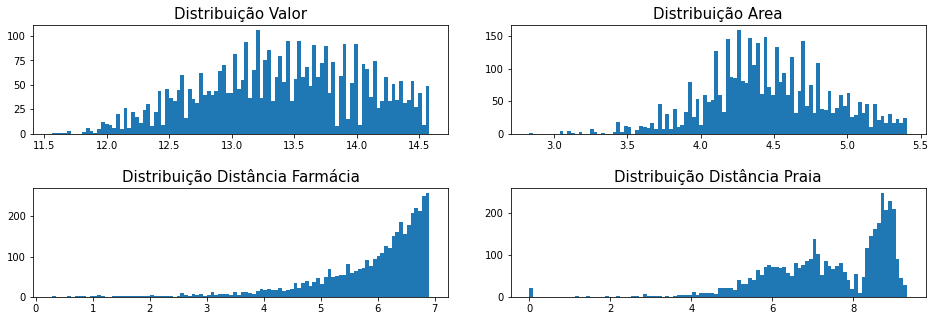

In [ ]:
fig, graficos = plt.subplots(2,2, figsize= (10,5))
plt.subplots_adjust(wspace = 0.15, hspace = 0.5)

graficos[0][0].hist(casas_sem_outliers['Log_Valor'], bins = 100)
graficos[0][0].set_title('Distribuição Valor', fontsize = 15)
graficos[0][0].figure.set_size_inches(16,5)

graficos[0][1].hist(casas_sem_outliers['Log_Area'], bins = 100)
graficos[0][1].set_title('Distribuição Area', fontsize = 15)
graficos[0][1].figure.set_size_inches(16,5)

graficos[1][0].hist(casas_sem_outliers['Log_Dist_Farmacia'], bins = 100)
graficos[1][0].set_title('Distribuição Distância Farmácia', fontsize = 15)
graficos[1][0].figure.set_size_inches(16,5)

graficos[1][1].hist(casas_sem_outliers['Log_Dist_Praia'], bins = 100)
graficos[1][1].set_title('Distribuição Distância Praia', fontsize = 15)
graficos[1][1].figure.set_size_inches(16,5)

#Analisando o tratamento logaritmico - linha de regressão

Vamos plotar os gráficos de dispersão com as linhas de dispersão com os novos dados logaritmos para ver se temos uma melhora de fato na hora de modelar a linha de regressão:

##Gráfico de Dispersão com linha de regressão - Com outliers

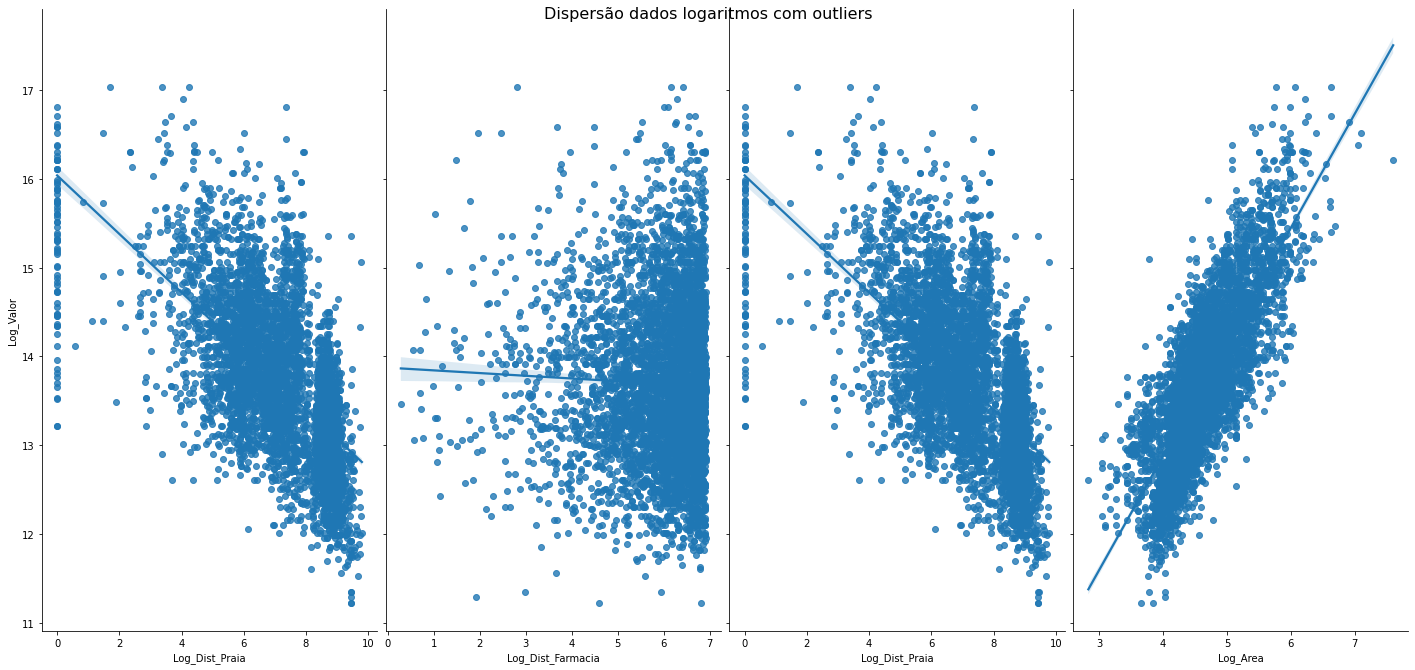

In [ ]:
grafico = sns.pairplot(casas, y_vars = 'Log_Valor', x_vars = ['Log_Dist_Praia', 'Log_Dist_Farmacia', 'Log_Dist_Praia', 'Log_Area'], kind = 'reg', height = 5)
grafico.fig.suptitle("Dispersão dados logaritmos com outliers", fontsize = 16)
grafico.figure.set_figheight(10)

##Gráfico de Dispersão com linha de regressão -  Sem Outliers

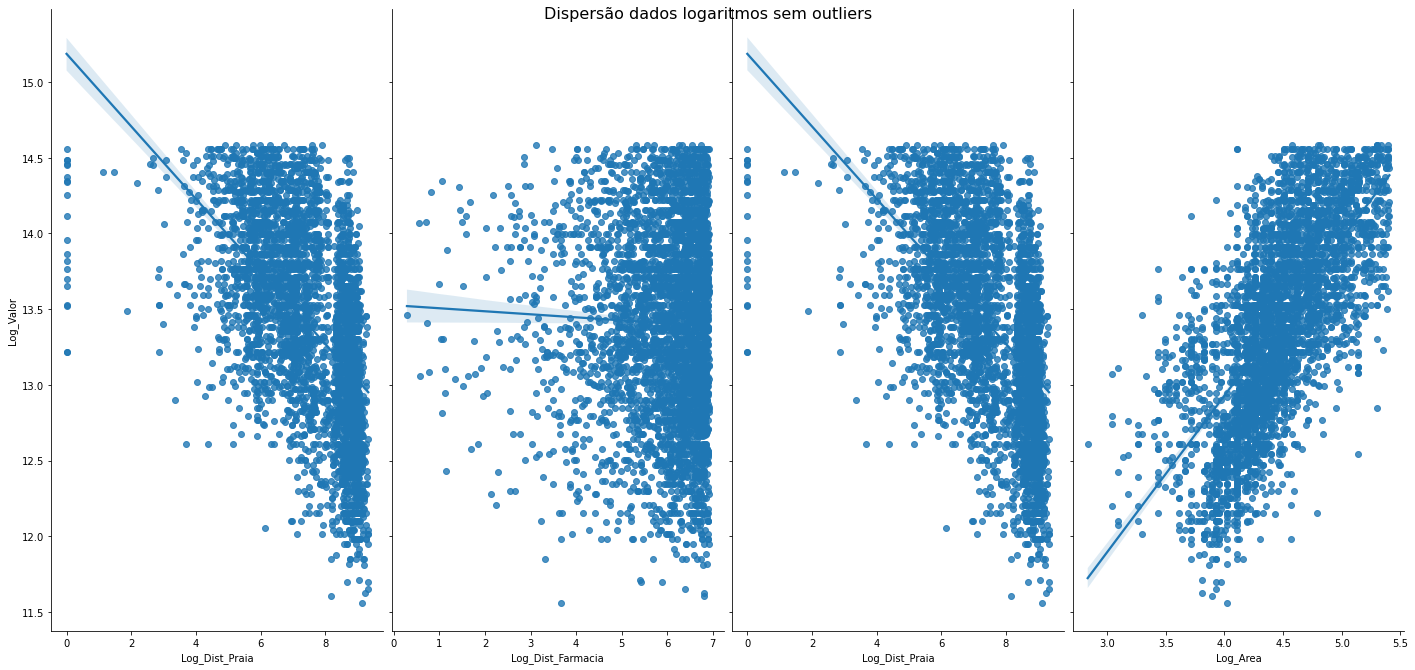

In [ ]:
grafico = sns.pairplot(casas_sem_outliers, y_vars = 'Log_Valor', x_vars = ['Log_Dist_Praia', 'Log_Dist_Farmacia', 'Log_Dist_Praia', 'Log_Area'], kind = 'reg', height = 5)
grafico.fig.suptitle("Dispersão dados logaritmos sem outliers", fontsize = 16)
grafico.figure.set_figheight(10)

Temos que ter cuidado ao comparar esses dois gráficos... Veja que eles tem amplitudes de Y diferentes, os gráficos co outliers de uma amplitude maior que os gráficos sem outliers. Isso pode nos dar uma falsa impressão que, os gráficos com outliers estão mais ajustados a linha de regressão.

#Criando Datasets de Treino e Teste

importando o método que vai separar nossos dados e treino e teste, o método train_test_split do scikitlearn ou sklearn

In [ ]:
from sklearn.model_selection import train_test_split

###Separando Dataset com outliers

Criando dados de teste para o modelo com outliers. Note que, quando não tiramos os outliers, nossos dados para treino e teste são maiores o que pode ou não ser uma vantagem.

In [ ]:
x_log = casas[['Log_Area', 'Log_Dist_Praia', 'Log_Dist_Farmacia']]
y_log = casas['Log_Valor']

Separando os dados de treino e teste para os dados com outliers

In [ ]:
x_log_treino, x_log_teste, y_log_treino, y_log_teste = train_test_split(x_log, y_log, test_size=0.2, random_state=2811)

In [ ]:
x_log_treino

,Log_Area,Log_Dist_Praia,Log_Dist_Farmacia
2661,5.948035,0.000000,6.145498
912,3.178054,7.406414,6.724169
3042,4.330733,8.521233,6.442167
141,3.433987,5.900023,6.712234
3854,5.680173,3.518011,4.684684
...,...,...,...
3657,5.081404,8.789600,5.983916
979,4.189655,9.097929,5.137973
2389,4.406719,7.981895,6.229311
447,3.970292,8.953078,5.496422


###Separando Dataset sem outliers

Criando os dados de teste para os modelos sem outliers

In [ ]:
x_log_sem_outliers = casas_sem_outliers[['Log_Area', 'Log_Dist_Praia', 'Log_Dist_Farmacia']]
y_log_sem_outliers = casas_sem_outliers['Log_Valor']

In [ ]:
x_log_treino_sem_outliers, x_log_teste_sem_outliers, y_log_treino_sem_outliers, y_log_teste_sem_outliers = train_test_split(x_log_sem_outliers, y_log_sem_outliers, test_size=0.2, random_state=2811)

In [ ]:
x_log_treino_sem_outliers

,Log_Area,Log_Dist_Praia,Log_Dist_Farmacia
4351,4.700480,8.729382,6.690465
1402,4.007333,8.718579,5.983453
808,4.394449,6.622049,5.392054
1424,4.709530,8.814221,6.588527
997,4.663439,5.258971,6.899606
...,...,...,...
2963,4.262680,5.343930,6.227542
1368,4.189655,8.311891,6.264257
3790,4.406719,7.154247,6.440353
551,4.499810,6.779702,6.341376


#Modelando a regressão linear - Modelo log - Linear

Benévolo... perceba que nossos valores agora estão todos em log, logo, nosso modelo de regressão linear vai aprender com valores logaritmos que, como já foi mostrado anteriormente, são valores muito mais baixos que os reais.

Vale ressaltar que, mesmo que os novos valores logaritmicos tem uma correspondencia em função aos valores reais, isto é, um valor real do nosso dataset original tem apenas um correspondente logaritmico!! valor_real --> função log --> valor_log.

Feito essa ressalva, voltemos ao raciocínio... Note que não podemos aplicar nesses dados logaritmicos a nossa função LinearRegression.fit(), pois ela vai retornar valores logaritmicos para a variável Y que queremos prever....

Nestes casos onde passamos os valores para a escala logaritmica *** NÃO podemos usar um modelo de Regressão Linear ESCALAR***!!!

Mas Sim um modelo de ***Regressão Linear Logaritmico***, mais conhecido como ***Modelo Log_linear***!!

O que eu quero dizer é que nossa equação de regressão linear que estudamos no curso Regressão Linear I não vai ser usada para treinar e fazer o modelos de regressão! A equação da reta de regressão para dados escalares (que tinhamos usado) é a seguinte:

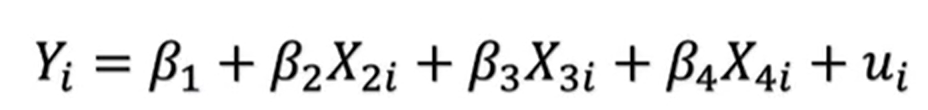

No lugar dela vamos usar o modelo de reta de regressão logaritima, que já está preparada para treinar com dados no formato logaritimicos!

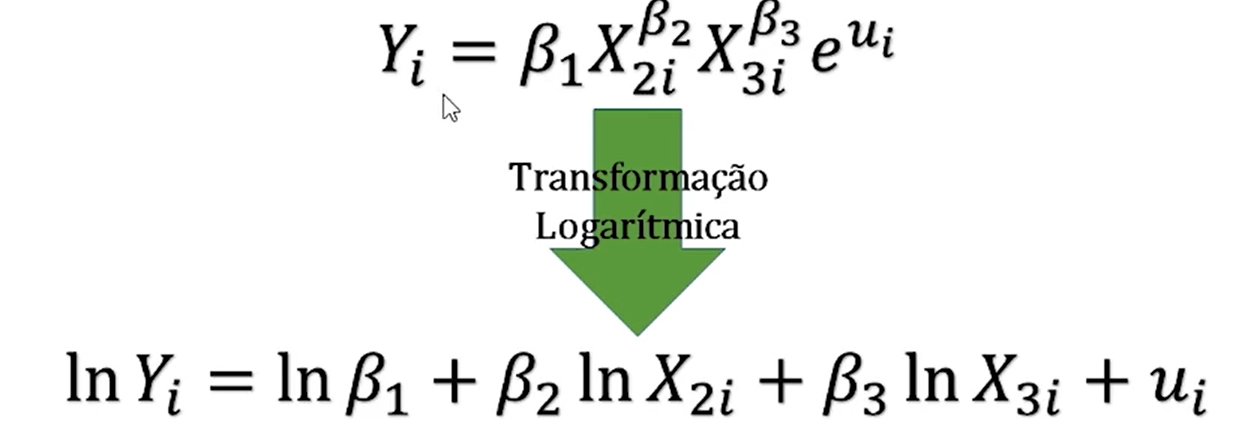

Ao aplicarmos log natural ln, em todo nosso dataset, vimos que 'normalizamos' nosso conjunto de d

Aplicando Log na base natural ln nos dois lados e fazendo manipulações com as propriedades logaritmicas simples, chegamos a equação de reta logaritmica.

Mas benévolo... perceba que... nessa função de regressão não temos a contante B1, o intercepto, que nada mais é que o valor de Y onde a reta intercepta o eixo Y.

In [ ]:
import statsmodels.api as sm

O statsmodels é um módulo Python que vamos usar para fazer a modelagem da regressão a partir dos dados de treino. Já avisando que, como o nome já sugere a biblioteca "statsmodels" é usado para modelar regressões (calcular o intercepto e os coneficientes) e para gerar estatística que vamos usar para avarliar se aquele modelo é bom ou não, como estatísticas R², R ajustado, estatística F... Mas ele não gera previsões!!!

Ora, vc deve se perguntar... Então porque vamos usar a biblioteca "statsmodels" para modelar nossa reta de regressão? Não poderiamos fazer isso com a função Linear Regression da biblioteca Sklearn?

Sim, podemoriamos fazer sem problemas a modelagem usando o Sklearn, álias ainda vamos usar ela para fazer as previsões! Benévolo, vamos usar o "Statsmodels" para gerar uma estatística em espeficico que vai nos ajudar a responder a seguinte pergunta:

- Qual das variáveis explicativas realmente deve ser usada para o treinamento do nosso modelo de regressão linear?

A estatística que vai nos responder essa pergunta é a estatística é a estatística F e a estatística T, que veremos no próximo tópico

#Resumo Estatísticas R², R² ajustado, F e T

Quando queremos avaliar um modelo de regressão, existem 4 estatística fundamentais para medir a acurácia do nosso modelo de regressão:

 - ***R² = 0,789:***  Estatística R² mede a porcentagem explicativa do nosso modelo, isto é, R² = 0,789 significa que nosso modelo consegue explicar 78,9% dos valores de Y, que no caso é o valor da casa

 - ***R² ajustado = 0,789:*** É uma medidad que pega o valor de R² e penaliza ele pelo uso exessivo de variáveis explicativas/independentes para a modelagem da reta de regressão. Ele fica dentro de um range(0,R²), quanto mais próximo de R² isso indica que, não estamos usando variáveis explicativas atoa!

 - ***Estatística F:*** É um teste de hipotese nula, a hipotese nula de que as variáveis explicativas que escolhemos não ajudam em nada em prever a variável dependente Y, que no caso é o valor da casa. Quando isso ocorre (as variáveis explicativas não explicarem em nada a variável dependente), isso significa que na equação de reta da regressão, os valores de coeficientes angulares/parciais de todas as variáveis explicativas é zero:
  - Se a Hipotese Nula (H0) for Verdadeira: Valor = 0 * Dist_Praia + 0 * Dist_Farmacia + 0 * Area
  - Note que a equação de regressão acima representa essa hipotese nula H0, pois para quaisquer valores das variáveis explicativas, o resultado sempre será 0, ou seja, não alteram a previsão, ou seja de novo, elas nao tem influência sobre Y.

 - ***Prob(Estatística F)*** : É a probabilidade de que a hipótese nula seja verdadeira, isto é, é a probabilidade de que as variáveis explicativas não expliquem nada sobre a variável Y.
  - Se Prob(Estatística F) < 0,05 : A hipótese nula é rejeitada, pois ela tem menos que 5% de chances de ser verdadeira, isso implica que, a hipótese contrária/não nula tem mais que 95% de chances de ser verdadeira.
  - A hipótese contrária/não nula H1 é que ao menos uma das variáveis selcionadas consegue explicar a variável Y, ou seja, ao menos uma das variáveis explicativas tem coeficiente angular/parcial diferente de 0.

- ***Estatística T:*** O conceita da estatística T é muito parecido com da estatística F, a diferença é que na estatítica T é o teste de hipotese sobre apenas uma variável explicativa. O teste que a estatística T faz é da hipótese nula H0 sobre uma variável especifica, ou seja, se aquela variável tem poder explicativo sobre a variável dependente Y.
  - Se a Hipotese Nula (H0) for Verdadeira: Valor = 0 * variável_explicativa_de_interesse.

- **P|T| :** É a probabilidade de que a hipótese nula sobre a estatística T seja verdadeira, isto é, é a probabilidade de que uma variável explicativa não explique nada sobre a variável Y.
  - Se P|T| < 0,05 : A hipótese nula é rejeitada, pois ela tem menos que 5% de chances de ser verdadeira, isso implica que, a hipótese contrária/não nula tem mais que 95% de chances de ser verdadeira.
  - A hipótese contrária/não nula H1, é que aquela variável selcionada consegue explicar a variável Y, ou seja, aquela variável explicativa tem coeficiente angular/parcial diferente de 0.

#Mínimo quadrado Ordinário -OLS - Modelando e Medindo a Acurácio do Modelo

Vamos usar o método do mínimo quadrado ordinário, ou simplesmente, método do mínimo quadrado, para calcular o intercepto e os coeficintes parciais da nossa reta de regressão, ou seja, o método matemático que de fato vai modelar nossa reta de regressão.

Se você se lembrar (caso não se lembre, no notebook de regfressão linear I, explicamos com detalhes sobre o método do mínimo quadrados), podemos calcular o intercepto e os coeficientes parciais com operações matriciais, mas isso pede que a matriz dos valores das variáveis independentes Xs tenha na sua primeira coluna, uma coluna com valores "1".

Para isso a biblioteca statsmodels.api, tem um metodo chamado "add_const()", que vai adicionar essa coluna de números "1":

Vamos usar o método add.constants() do statsmodels, ele vai add uma coluna 'const' que vai nos auxliar a calcular nosso intercepto.

###Modelando a reta de regressão com o Mínimo Quadrados - Com Outliers

In [ ]:
x_log_treino_com_const = sm.add_constant(x_log_treino)
x_log_treino_com_const

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Log_Area,Log_Dist_Praia,Log_Dist_Farmacia
2661,1.0,5.948035,0.000000,6.145498
912,1.0,3.178054,7.406414,6.724169
3042,1.0,4.330733,8.521233,6.442167
141,1.0,3.433987,5.900023,6.712234
3854,1.0,5.680173,3.518011,4.684684
...,...,...,...,...
3657,1.0,5.081404,8.789600,5.983916
979,1.0,4.189655,9.097929,5.137973
2389,1.0,4.406719,7.981895,6.229311
447,1.0,3.970292,8.953078,5.496422


Vamos usar o método .OSL() que é exatamente o método de Minímo Quadrado Ordinário. passamos como parametro os Y e X de treino e vamos avisar que queremos que ele calcule o interceptop, com o parâ,etro hasconst =True:

In [ ]:
modelo_reg_log_com_outliears = sm.OLS(y_log_treino, x_log_treino_com_const, hasconst = True).fit()

Veja que, já estamos treinando nosso modelo de regressão linear com o método 'fit'. Não precisamos passar os x e Y de treino para o fit(), pois já estamos mandando para o método OLS(Mínimo quadrado ordinário)

In [ ]:
modelo_reg_log_com_outliears

Diferente da classe LinearRegression do sklearn, o método OLS da biblioteca statsmodels, ele tem métodos que já nos devolvem todas as métricas para a valiar o modelo de regressão linear, como o método .summary()

In [ ]:
print(modelo_reg_log_com_outliears.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Valor   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     4988.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:37:34   Log-Likelihood:                -2199.2
No. Observations:                4000   AIC:                             4406.
Df Residuals:                    3996   BIC:                             4432.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.2268      0.08

Análise:

- R²: O valor de 0,789 é um valor alto para o coeficiente de determinação, pois a cima de 0,7 já se assume como bom. Isso quer dizer que, nosso modelo de regressão consegue explicar 78,9% de todos os valores de Y.

- R² ajustado: Aqui temos a melhor situação de todas para o valor de R² ajustado, isto é, quando R² ajustado = R². Isso uqer dizer que todas as variáveis explicativas tem algum tipo de relação, mesmo que mínima, com a
variável dependente Y.

- P(Estatística F) = 0: É o melhor caso que podemos querer para a probabilidade da estatística F. P(F) = 0 significa que a probabilidade de que a Hipótese Nula seja verdadeira é de 0%. Lembrando que a Hipótese Nula (H0) é a hipótese de que todas as variáveis escolhidas para treinar nosso modelo na verdade não conseguem explicar nada de Y, isto é, que na equação de reta da regressão, todos os coeficientes para as variáveis explicativas é igual a zero.

- P|T| = 0,458: Veja que, o método nos retornou que, para a variãvel Log_Dist_Farmacia o seu P|T|=0,458. Isso é ruim uma vez que a propabilidade da estatística T mede a probabilidade da Hipótese Nula seja verdadeira para aquela variável em questão, isto é, P|T| é a probabilidade de que a variável em questão não consegue explicar em nada a variável Y. Para nosso exemplo, P|T| = 0,458 significa que existe uma chance 45,8% de que a variável Log_Dist_Farmacia não ajudar em quase nada na hora da previssão.


Logo podemos concluir que, se retiramos a variável Log_Dist_Farmacia, o valor do R² não vaiser alterado em nada, pois existe uma chance de 45,8% dela de fato de agregar em nada nosso modela:

In [ ]:
x_log_sem_distFarm = casas[['Log_Area', 'Log_Dist_Praia']]
y_log = casas['Log_Valor']
x_log_treino_sem_DistFarm, x_log_teste_sem_DistFarm, y_log_treino, y_log_teste = train_test_split(x_log_sem_distFarm , y_log, test_size=0.2, random_state=2811)
x_log_treino_com_const_sem_DistFarm = sm.add_constant(x_log_treino_sem_DistFarm)
x_log_treino_com_const_sem_DistFarm

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Log_Area,Log_Dist_Praia
2661,1.0,5.948035,0.000000
912,1.0,3.178054,7.406414
3042,1.0,4.330733,8.521233
141,1.0,3.433987,5.900023
3854,1.0,5.680173,3.518011
...,...,...,...
3657,1.0,5.081404,8.789600
979,1.0,4.189655,9.097929
2389,1.0,4.406719,7.981895
447,1.0,3.970292,8.953078


In [ ]:
modelo_reg_log_com_outliears_sem_Farmacia = sm.OLS(y_log_treino, x_log_treino_com_const_sem_DistFarm, hasconst = True).fit()
print(modelo_reg_log_com_outliears_sem_Farmacia.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Valor   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     7483.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:37:34   Log-Likelihood:                -2199.5
No. Observations:                4000   AIC:                             4405.
Df Residuals:                    3997   BIC:                             4424.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.1967      0.073    139.

Benévolo, como esperado, os valores R² e R² ajustado continuam o mesmos, isto é, sem a variável Dist_Farmacia o nosso modelo de regressão continua com a mesma performasse, o que já era esperado!

Pois, como haviamos visto, o valor da probabilidade de T para a variável Dist_farmacia era: P(T) = 45,8%,  isto é, a probabilidade de que a Hipótese Nula H0 (hipótese de que Dist_Farmacia não ajudar em nada a prever o Valor da casa) seja verdadeira era de 45,8%. Isso é um valor muito alto! Pois para que a Hipótese Nula seja rejeitada ela deve ter uma probabilidade de no máximo 5% de ser verdadeira

###Modelando a reta de regressão com Mínimo Quadrados - Sem Outliers

In [ ]:
x_log_treino_com_const_sem_outliers = sm.add_constant(x_log_treino_sem_outliers )
x_log_treino_com_const_sem_outliers

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Log_Area,Log_Dist_Praia,Log_Dist_Farmacia
4351,1.0,4.700480,8.729382,6.690465
1402,1.0,4.007333,8.718579,5.983453
808,1.0,4.394449,6.622049,5.392054
1424,1.0,4.709530,8.814221,6.588527
997,1.0,4.663439,5.258971,6.899606
...,...,...,...,...
2963,1.0,4.262680,5.343930,6.227542
1368,1.0,4.189655,8.311891,6.264257
3790,1.0,4.406719,7.154247,6.440353
551,1.0,4.499810,6.779702,6.341376


In [ ]:
modelo_reg_log_sem_outliears = sm.OLS(y_log_treino_sem_outliers , x_log_treino_com_const_sem_outliers, hasconst = True).fit()
print(modelo_reg_log_sem_outliears.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Valor   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2291.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:37:34   Log-Likelihood:                -1246.3
No. Observations:                3204   AIC:                             2501.
Df Residuals:                    3200   BIC:                             2525.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.7118      0.08

interpretando as estatíticas:

- R² = 0,682 --> Benévolo, para qualque modelo de regressão, o mínimo aceitável é de um R² >= 0,7, a baixo disso podemos dizer que a regressão é mediana e pode ser considerada incomclusiva! Veja que, para este tipo de problema e contexto, retirar outliers pode empobrecer nosso modelo de regressão. Isso ocorre porque para este contexto, a existencia de outliers é esperado! Isto é, é esperado que existam casa com um Valor muito acima dos demais! Ela estar a cima do demais deve a fatores como tamanho a cima do normal da casa, proximidade com a casa...

- R2 ajustado = 0,682 --> Este é o caso perfeito, pois como já foi comentado, o R² ajustado nada mais é que o R² só que penalizado por utilizar várias variáveis explicativas que não tem tanta força de explicação do fenômeno de interesse.

- P(estatística F) = 0,00 --> É a probabilidade de que a hipótese nula sobra todas as variáveis explicativas selecionadas sejam verdadeira, isto é, é a probabilidade de que as variáveis explicativas selecionadas não expliquem em nada os valores assumidos pela variável dependente. Neste caso temos que essa probabilidade é 0%, que é o melhor caso possível!

- P|T| = 0.47 --> A probabilidade de que a hipótese nula seja verdadeira para a variável Dist_Farmacia é de 47%, isto é, a probabilidade de que a variável Dist_Farmacia não tenha nenhum poder explicativo é de 47%, o que é altíssimo, visto que o máximo aceitavél é de 5%. Essa Hipótese Nula se confirma quando analisamos o valor do coeficiente angular da variável Dist_Farmacia, veja que ele é -0,0045, ou seja, a variação da variável Dist_Farmacia tem efeito quase que nulo na variável dependente Y!

Como já foi mencionado, para quakquer variável explicativa que tenha probabilidade maior que 5% de sua hipótese nula ser verdadeira, ela deve ser retirada do modelo de regressão, pois ela não agrega em muita coisa, ou em nada, na acurácia do modelo!

Vamos testar essa regra, isto é, vamos modelar de novo nossa regressão sem outliers mas agora sem a variável explicativa Dist_Farm, e a acurácia deve se manter a mesma ou quase a mesma:

In [ ]:
x_log_sem_outliers_distFarm = casas_sem_outliers[['Log_Area', 'Log_Dist_Praia']]
y_log_sem_outliers = casas_sem_outliers['Log_Valor']
x_log_treino_sem_outliers_DistFarm, x_log_teste_sem_outliers_DistFarm, y_log_treino_sem_outliers, y_log_teste_sem_outliers = train_test_split(x_log_sem_outliers_distFarm , y_log_sem_outliers , test_size=0.2, random_state=2811)
x_log_treino_com_const_sem_Outliers_DistFarm = sm.add_constant(x_log_treino_sem_outliers_DistFarm)
x_log_treino_com_const_sem_Outliers_DistFarm

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Log_Area,Log_Dist_Praia
4351,1.0,4.700480,8.729382
1402,1.0,4.007333,8.718579
808,1.0,4.394449,6.622049
1424,1.0,4.709530,8.814221
997,1.0,4.663439,5.258971
...,...,...,...
2963,1.0,4.262680,5.343930
1368,1.0,4.189655,8.311891
3790,1.0,4.406719,7.154247
551,1.0,4.499810,6.779702


In [ ]:
modelo_reg_log_sem_outliears_DistFarm = sm.OLS(y_log_treino_sem_outliers , x_log_treino_com_const_sem_Outliers_DistFarm, hasconst = True).fit()
print(modelo_reg_log_sem_outliears_DistFarm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Valor   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3437.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:37:35   Log-Likelihood:                -1246.5
No. Observations:                3204   AIC:                             2499.
Df Residuals:                    3201   BIC:                             2517.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.6834      0.079    134.

Como previsto, a remoção da variável explicativa "Dist_Farmacia" não diminui a acurácia do nosso modelo!

Benévolo, como nosso R² é menor que 0.7, vamos descartar este modelo e vamos ficar apenas com o modelo com outliers

#Gerando Previões com os modelos

##Gerando previsões com o modelo com outliers

benévolo, infelizmente teremos que modelar outro modelo de regressão com a biblioteca Sklearn, pois o modelo calculado com a biblioteca StatsModels ele apenas nos fornece estatísticas sobre o modelo e não previões! Mas não se preocupe, se utizarmos as mesmas variáveis explicativas e os mesmos dados de treino, vamos obeter exatamente a mesma reta de regressão, isto é, vamos obter os mesmoa valores de intercepto e dos coeficientes angulares/parciais, o que faz todo sentido.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
modelo_com_outliers = LinearRegression()
modelo_com_outliers

LinearRegression()

Vamos treinar nosso modelo, lebrando que já separamos subset que não contem a variável Dist_Farmacia, um de treino e outro de teste:

In [ ]:
x_log_sem_distFarm

,Log_Area,Log_Dist_Praia
0,5.638355,5.488630
1,5.342334,6.808085
2,5.141664,4.103061
3,4.615121,7.966996
4,5.105945,5.483790
...,...,...
4995,4.262680,6.174530
4996,4.859812,9.058993
4997,4.262680,5.537878
4998,4.025352,9.098987


In [ ]:
y_log

0       15.341567
1       13.710151
2       14.751604
3       13.217675
4       14.603968
          ...    
4995    13.507627
4996    13.710151
4997    13.592368
4998    12.154785
4999    13.217675
Name: Log_Valor, Length: 5000, dtype: float64

In [ ]:
x = x_log_sem_distFarm[["Log_Area", "Log_Dist_Praia"]]

In [ ]:
x_treino, x_teste, y_treino, y_teste =  train_test_split(x_log_sem_distFarm, y_log, test_size = 0.2, random_state=2811)

In [ ]:
modelo_com_outliers.fit(x_treino, y_treino)
print("R² : ", modelo_com_outliers.score(x_teste, y_teste))

R² :  0.7819334902362259


Veja que o valor obtido de R² para o modelo de regressão feito pelo Sklearn tem o mesmo R² do modelo feito pelo StatsModels, isso de deve ao fato dos dois serem trienados com as mesmas variáveis explicativas!

Agora vamos gerar de fato as previsões com o nosso modelo, e para isso vamos usar o função predict()

In [ ]:
y_previsto_com_outliers = modelo_com_outliers.predict(x_teste)
previsto_x_real_com_outliers = pd.DataFrame({"Real Log Valor": y_teste, "Previsto Log Valor": y_previsto_com_outliers})
previsto_x_real_com_outliers

,Real Log Valor,Previsto Log Valor
1006,15.150512,14.226882
3115,12.706851,12.711363
4394,13.279369,13.233411
3877,13.592368,13.480981
1175,13.304687,13.255051
...,...,...
1808,13.997833,14.982639
3035,12.660331,12.808015
1424,13.579789,13.418545
4452,14.077876,13.628132


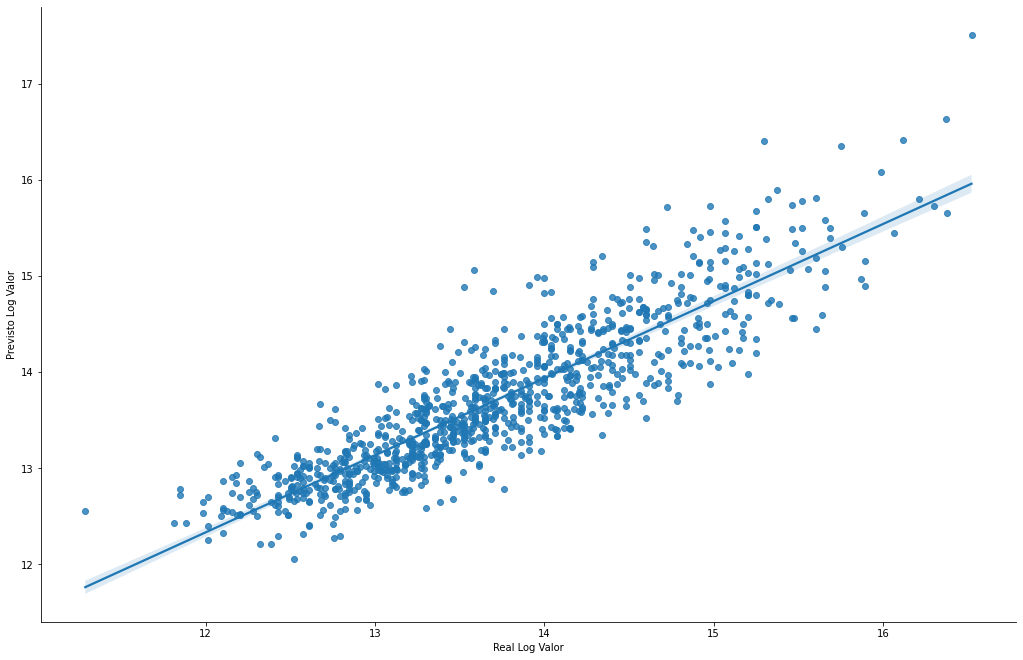

In [ ]:
g = sns.lmplot(data = previsto_x_real_com_outliers, x = 'Real Log Valor', y ='Previsto Log Valor')
g.figure.set_size_inches(16,10)

Benévolo, a linha são os valores previstos por nosso modelo, o que faz sentido, pois se a regressão lienar nada mais é que uma reta, os valores previstos pelo modelo formarão uma reta! Os pontos dispersos entorno da reta são os valores reais! Logo, se nosso modelo tivesse uma acurácia perfeita, todos os valores reais estariam sobre a mesma reta da regressão modelada.

Mesma que o nosso caso não seja esse caso perfeito, vemos que os pontos reais ficam próximos a reta modelada, o que é muito bom, e é a reflexão do nosso valor alto de R² para o nosso modelo!

In [ ]:
metrics.r2_score(y_log_teste, y_previsto_com_outliers)

0.7819334902362259

Se calculamos o valor de R² entre as duas variáveis, vemos que o valor de R² se é exatamente o mesmo do R² que calculamos na célula 111, isso deve ao fato de que, o médoto .score(x_teste, y_teste) faz exatamente a mesma coisa! Ele pega os valores de X_teste e coloca dentro da função de reta modelada! Por se tratar de uma equação de reta, todos os valores formarão uma reta! Já os valores reais - y_teste -  ficarão entorno desta reta! Apartir desse cenário o método .score() calcula o valor R² como já sabemos calcular!

#Invertendo Tranformação logaritimica

Benévolo veja para os valores dentro da tabela de valores reais e previstos:

In [ ]:
previsto_x_real_com_outliers

,Real Log Valor,Previsto Log Valor
1006,15.150512,14.226882
3115,12.706851,12.711363
4394,13.279369,13.233411
3877,13.592368,13.480981
1175,13.304687,13.255051
...,...,...
1808,13.997833,14.982639
3035,12.660331,12.808015
1424,13.579789,13.418545
4452,14.077876,13.628132


Eles ainda estão em escala logaritimica! Ou seja, eles ainda não estão em reais! Devemos aplicar a operação inversa da transformação logaritimica na base natural que fizemos no começo deste notebook.

benévolo, se eu tenho inicialmente o valor "a" e coloco ele no logaritimo natural ln(a), para desfazer essa transformação devo elevar esse logaritimo na base "e", veja:

In [ ]:
valor_inicial = 10
np.log(valor_inicial)

2.302585092994046

In [ ]:
np.exp(np.log(valor_inicial))

10.000000000000002

In [ ]:
np.e**np.log(valor_inicial)

10.000000000000002

Sabendo agora desfazer essa transformoção logaritimica, vamos transformar nossos dados para a escala real de valore esperados para a variável VALOR:

In [ ]:
previsto_x_real_com_outliers["Valor Real R$"] = np.exp(previsto_x_real_com_outliers["Real Log Valor"])
previsto_x_real_com_outliers["Valor Previsto R$"] = np.exp(previsto_x_real_com_outliers["Previsto Log Valor"])
previsto_x_real_com_outliers

,Real Log Valor,Previsto Log Valor,Valor Real R$,Valor Previsto R$
1006,15.150512,14.226882,3800001.0,1.508885e+06
3115,12.706851,12.711363,330001.0,3.314935e+05
4394,13.279369,13.233411,585001.0,5.587241e+05
3877,13.592368,13.480981,800001.0,7.156748e+05
1175,13.304687,13.255051,600001.0,5.709464e+05
...,...,...,...,...
1808,13.997833,14.982639,1200001.0,3.212754e+06
3035,12.660331,12.808015,315001.0,3.651323e+05
1424,13.579789,13.418545,790001.0,6.723572e+05
4452,14.077876,13.628132,1300001.0,8.291298e+05


Benévolo, perceba que quando revertemos essa transformação logaritimica, a diferença entro os valores reais oe previsto em alguns casos é muto grande! Veja por exemplo, que na linha de indice 1006, o valor real do imóvel era de 380 mil e o valor previsto foi de 150 mil! Veja que diferença grande!!

In [ ]:
metrics.r2_score(previsto_x_real_com_outliers['Valor Real R$'], previsto_x_real_com_outliers['Valor Previsto R$'])

0.39336180480303573

Isso se reflete no valor de R² quando ele é calculado entre os valores reais em Reais e os valores previsto em Reais

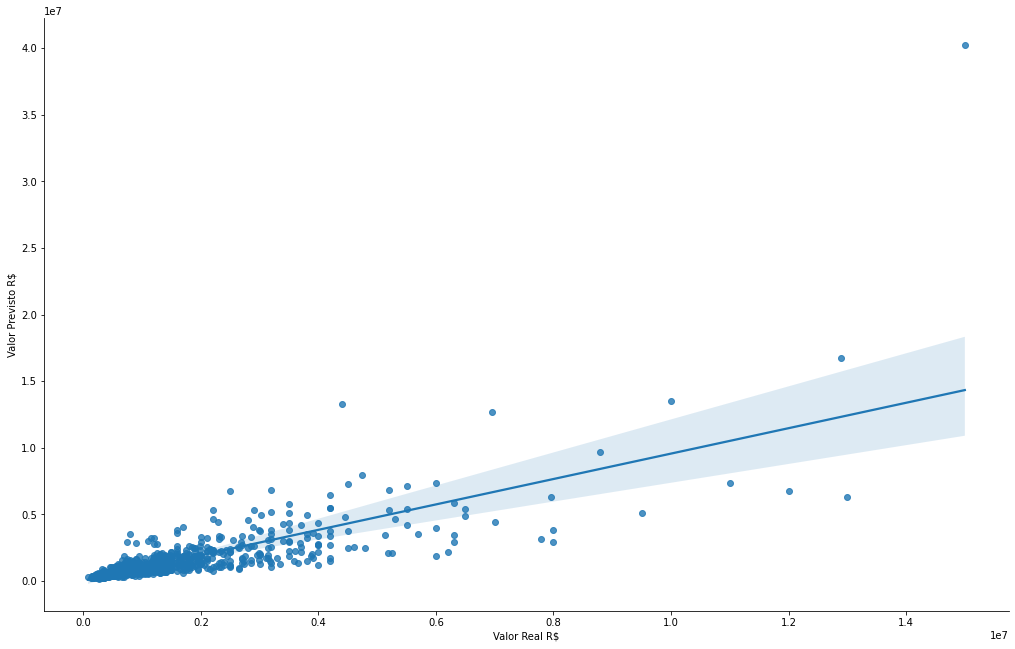

In [ ]:
g = sns.lmplot(data = previsto_x_real_com_outliers, x = 'Valor Real R$', y ='Valor Previsto R$')
g.figure.set_size_inches(16,10)

#Gerador de previões

In [ ]:
def calcular_valor(area, distancia):
  area = np.int64(area)
  distancia = np.int64(distancia)
  area = np.log(area)
  distancia = np.log(distancia + 1)
  return np.exp(modelo_com_outliers.predict([[area, distancia]])[0])

In [ ]:
print("Bem vindo ao calculador do valor do imovel!\nPor favor, digite os seguintes parâmetros:")
area = input('Quantos metros quadrados tem o imovel? \n')
dist = input('Qual é a distancia em metros do imovel até a praia mais próxima?\n')
print("O valor do imovel é : {0: .2f}" .format(calcular_valor(area, dist)))

Bem vindo ao calculador do valor do imovel!
Por favor, digite os seguintes parâmetros:
Quantos metros quadrados tem o imovel? 
60
Qual é a distancia em metros do imovel até a praia mais próxima?
500
O valor do imovel é :  596666.21


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#Interpretação dos Coeficientes e Intercepto

vamo olhar para os valores do interpcepto e dos coeficientes que nosso modelo gerou. Lembrando que, como nosso modelo treinou com lavores logaritimicos, os valores do intercepto e dos coeficientes parciais/angulares também estão em escala logaritimica.

O que vamos fazer aqui é, primeiro interpretar a equação de reta de regressão na escala logaritimica e depois fazer a transformação desses valores em valores escalares:

In [ ]:
modelo_com_outliers.coef_

array([ 1.07416563, -0.20841405])

In [ ]:
x_treino.columns

Index(['Log_Area', 'Log_Dist_Praia'], dtype='object')

In [ ]:
modelo_com_outliers.intercept_

10.196736964771835

In [ ]:
index = ["Log Area", "Log Distancia Praia", "intercepto"]
coeficientes_log = pd.DataFrame({"Coeficientes":[modelo_com_outliers.coef_[0], modelo_com_outliers.coef_[1], modelo_com_outliers.intercept_]}, index = index)
coeficientes_log

,Coeficientes
Log Area,1.074166
Log Distancia Praia,-0.208414
intercepto,10.196737


***Interpretação***

- ***B1 = Coeficinte de Log Area = 1,074***: Esse valor em Log nos indica a ELASTICIDADE da variável Log Area em relação a variável Dependente Y - Valor -, isto é, B1 = 1,074  indica que, mantendo-se os valores das outras variável explicativas constante, a cada varição de +1% do valor de LOG AREA ele gera uma variação de 1,074% na variável Y - Log Valor -.

- ***B2 = Coeficinte de Log Distancia Praia = -0,208***: Esse valor em Log nos indica a ELASTICIDADE da variável Log Distancia Praia em relação a variável Dependente Y - Valor -, isto é, B2 = -0,208  indica que, mantendo-se os valores das outras variável explicativas constante, a cada varição de +1% do valor de LOG DISTANCIA PRAIA ele gera uma variação de -0,208% na variável Y - Log Valor -.

- ***B0 = Inpercepto = 10,196***: Esse valor indica o valor em Log quando os valores das variáveis explicativas são zero!

#Análise dos resíduos

Como você já deve saber, o resíduo nada mais é que a diferença entre o valor real e o previsto, logo podemos dizer que a formula para o cálculo do resíduo é:

***RESÌDUO = Y_REAL - Y_PREVISTO***

A análise da cada resíduo que temos entre o y_previsto e o y_real também é uma tecnica de avaliação de quão bom é nosso modelo de regressão. Isto é, quanto mais perto de zero/0 forem os resíduos, isso intuitivamente, nos mostra que melhor será nosso modelo de regressão.

Vamos calcular nosso resíduos:

In [ ]:
previsto_x_real_com_outliers

,Real Log Valor,Previsto Log Valor,Valor Real R$,Valor Previsto R$
1006,15.150512,14.226882,3800001.0,1.508885e+06
3115,12.706851,12.711363,330001.0,3.314935e+05
4394,13.279369,13.233411,585001.0,5.587241e+05
3877,13.592368,13.480981,800001.0,7.156748e+05
1175,13.304687,13.255051,600001.0,5.709464e+05
...,...,...,...,...
1808,13.997833,14.982639,1200001.0,3.212754e+06
3035,12.660331,12.808015,315001.0,3.651323e+05
1424,13.579789,13.418545,790001.0,6.723572e+05
4452,14.077876,13.628132,1300001.0,8.291298e+05


In [ ]:
previsto_x_real_com_outliers["Resíduo Log"] = previsto_x_real_com_outliers["Real Log Valor"] - previsto_x_real_com_outliers["Previsto Log Valor"]
previsto_x_real_com_outliers["Resíduo Log²"] = previsto_x_real_com_outliers["Resíduo Log"]**2
previsto_x_real_com_outliers

,Real Log Valor,Previsto Log Valor,Valor Real R$,Valor Previsto R$,Resíduo Log,Resíduo Log²
1006,15.150512,14.226882,3800001.0,1.508885e+06,0.923630,0.853093
3115,12.706851,12.711363,330001.0,3.314935e+05,-0.004512,0.000020
4394,13.279369,13.233411,585001.0,5.587241e+05,0.045958,0.002112
3877,13.592368,13.480981,800001.0,7.156748e+05,0.111387,0.012407
1175,13.304687,13.255051,600001.0,5.709464e+05,0.049636,0.002464
...,...,...,...,...,...,...
1808,13.997833,14.982639,1200001.0,3.212754e+06,-0.984806,0.969843
3035,12.660331,12.808015,315001.0,3.651323e+05,-0.147684,0.021811
1424,13.579789,13.418545,790001.0,6.723572e+05,0.161244,0.026000
4452,14.077876,13.628132,1300001.0,8.291298e+05,0.449744,0.202269


##Análise da distribuição dos Resíduos

Benévolo, uma das formas de se analisar os valores dos resíduos, é plotando esses em um grafo de distribuição, o que faz todo sentido, pois estamos falando de muitos resíduos (um resíduo para cada comparação previstoXreal):

Text(0, 0.5, 'Frequencia')

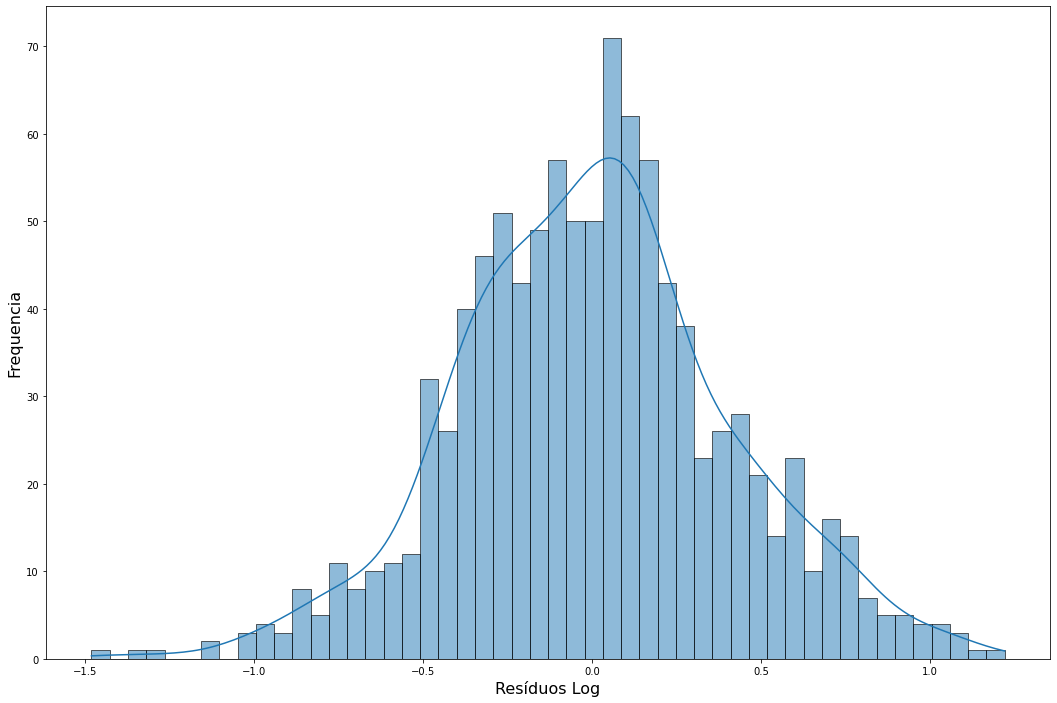

In [ ]:
x = sns.histplot(previsto_x_real_com_outliers["Resíduo Log"], kde = True, bins = 50)
x.figure.set_size_inches(18,12)
x.set_xlabel("Resíduos Log", fontsize = 16)
x.set_ylabel("Frequencia", fontsize = 16)

In [ ]:
previsto_x_real_com_outliers["Resíduo Real"] = previsto_x_real_com_outliers["Valor Real R$"] - previsto_x_real_com_outliers["Valor Previsto R$"]
previsto_x_real_com_outliers["Resíduo Real²"] = previsto_x_real_com_outliers["Resíduo Real"]**2
previsto_x_real_com_outliers

,Real Log Valor,Previsto Log Valor,Valor Real R$,Valor Previsto R$,Resíduo Log,Resíduo Log²,Resíduo Real,Resíduo Real²
1006,15.150512,14.226882,3800001.0,1.508885e+06,0.923630,0.853093,2.291116e+06,5.249211e+12
3115,12.706851,12.711363,330001.0,3.314935e+05,-0.004512,0.000020,-1.492491e+03,2.227529e+06
4394,13.279369,13.233411,585001.0,5.587241e+05,0.045958,0.002112,2.627692e+04,6.904763e+08
3877,13.592368,13.480981,800001.0,7.156748e+05,0.111387,0.012407,8.432622e+04,7.110911e+09
1175,13.304687,13.255051,600001.0,5.709464e+05,0.049636,0.002464,2.905459e+04,8.441692e+08
...,...,...,...,...,...,...,...,...
1808,13.997833,14.982639,1200001.0,3.212754e+06,-0.984806,0.969843,-2.012753e+06,4.051176e+12
3035,12.660331,12.808015,315001.0,3.651323e+05,-0.147684,0.021811,-5.013129e+04,2.513146e+09
1424,13.579789,13.418545,790001.0,6.723572e+05,0.161244,0.026000,1.176438e+05,1.384006e+10
4452,14.077876,13.628132,1300001.0,8.291298e+05,0.449744,0.202269,4.708712e+05,2.217197e+11


Text(0, 0.5, 'Frequencia')

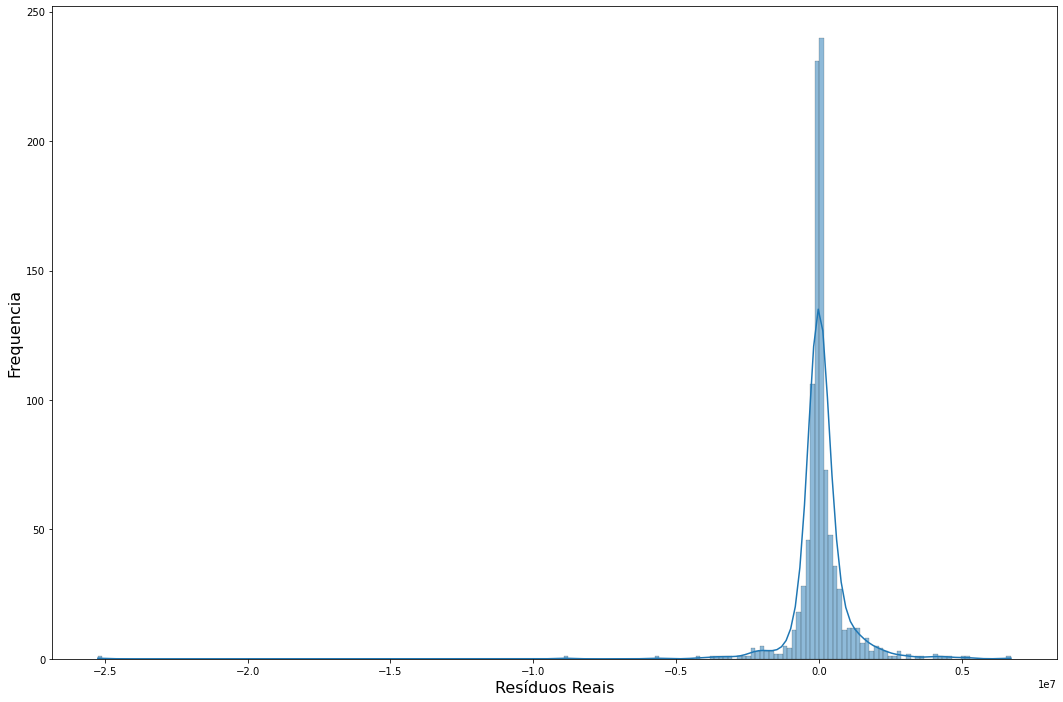

In [ ]:
x = sns.histplot(previsto_x_real_com_outliers["Resíduo Real"], kde = True, bins = 200)
x.figure.set_size_inches(18,12)
x.set_xlabel("Resíduos Reais", fontsize = 16)
x.set_ylabel("Frequencia", fontsize = 16)

In [ ]:
previsto_x_real_com_outliers["Resíduo Real²"].sum()

42352122.01320568

#Analisando Desempenho da regressão em R$ sem outliers

In [ ]:
x_log_sem_outliers = casas_sem_outliers[['Log_Area', 'Log_Dist_Praia']]
y_log_sem_outliers = casas_sem_outliers['Log_Valor']
x_log_treino_sem_outliers, x_log_teste_sem_outliers, y_log_treino_sem_outliers, y_log_teste_sem_outliers = train_test_split(x_log_sem_outliers, y_log_sem_outliers, test_size=0.2, random_state=2811)

In [ ]:
modelo_sem_out = LinearRegression()
modelo_sem_out.fit(x_log_treino_sem_outliers, y_log_treino_sem_outliers)

LinearRegression()

In [ ]:
modelo_sem_out.score(x_log_teste_sem_outliers, y_log_teste_sem_outliers)

0.6831468476067488

In [ ]:
y_log_previsto_sem_out = modelo_sem_out.predict(x_log_teste_sem_outliers)

In [ ]:
residuos_sem_out = pd.DataFrame({"Previsto valor Log":y_log_previsto_sem_out, "Previsto Real Valor": np.exp(y_log_previsto_sem_out) })
residuos_sem_out["Real Valor Log"] = np.array(y_log_teste_sem_outliers)
residuos_sem_out["Real Valor"] = np.exp(np.array(y_log_teste_sem_outliers))
residuos_sem_out["Residuos Reais"] = residuos_sem_out["Real Valor"] - residuos_sem_out["Previsto Real Valor"]


Text(0, 0.5, 'Frequencia')

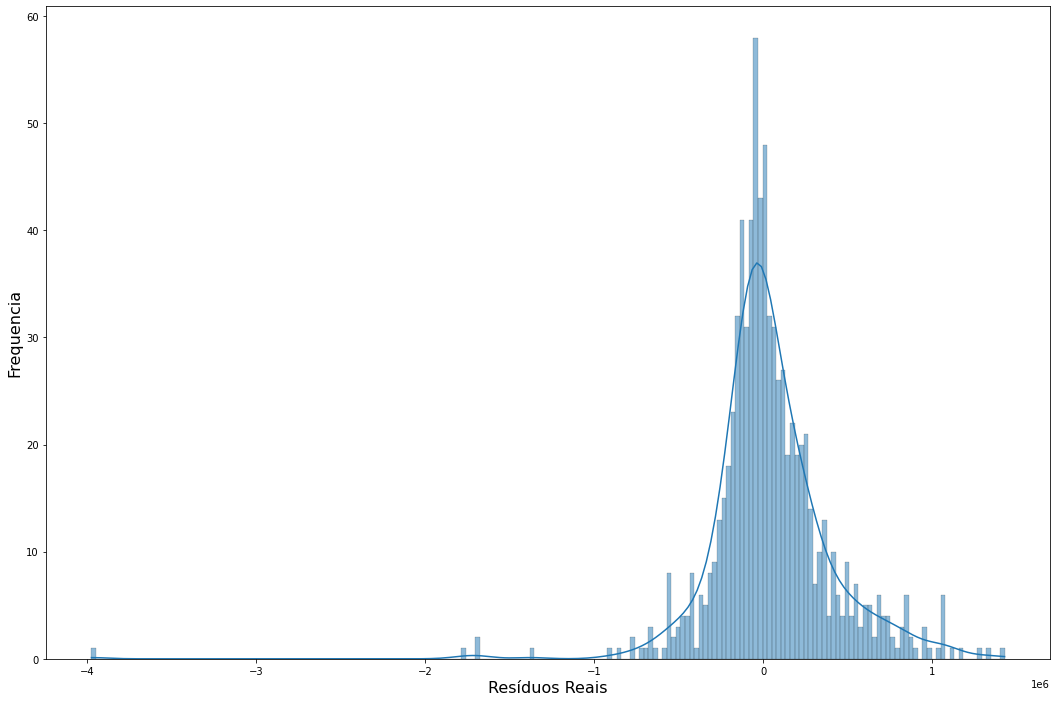

In [ ]:
x = sns.histplot(residuos_sem_out["Residuos Reais"], kde = True, bins = 200)
x.figure.set_size_inches(18,12)
x.set_xlabel("Resíduos Reais", fontsize = 16)
x.set_ylabel("Frequencia", fontsize = 16)

In [ ]:
metrics.r2_score(residuos_sem_out["Real Valor"], residuos_sem_out["Previsto Real Valor"])

0.43229210547719255

In [ ]:
residuos_sem_out

,Previsto valor Log,Previsto Real Valor,Real Valor Log,Real Valor,Residuos Reais
0,13.501640,730613.708240,13.785052,970001.0,239387.291760
1,13.066964,473053.694672,13.270785,580001.0,106947.305328
2,13.667034,862020.032232,13.287880,590001.0,-272019.032232
3,13.288564,590404.982405,13.081543,480001.0,-110403.982405
4,12.885415,394516.063361,12.899222,400001.0,5484.936639
...,...,...,...,...,...
797,13.715012,904386.419881,13.527830,750001.0,-154385.419881
798,13.633069,833232.956505,13.384729,650001.0,-183231.956505
799,13.542643,761193.870736,13.541075,760001.0,-1192.870736
800,12.864494,386347.963529,13.764218,950001.0,563653.036471


In [ ]:
residuos_sem_out["Real Residuos²"] = (residuos_sem_out["Real Valor"] - residuos_sem_out["Previsto Real Valor"])**2
residuos_sem_out

,Previsto valor Log,Previsto Real Valor,Real Valor Log,Real Valor,Residuos Reais,Real Residuos²
0,13.501640,730613.708240,13.785052,970001.0,239387.291760,5.730628e+10
1,13.066964,473053.694672,13.270785,580001.0,106947.305328,1.143773e+10
2,13.667034,862020.032232,13.287880,590001.0,-272019.032232,7.399435e+10
3,13.288564,590404.982405,13.081543,480001.0,-110403.982405,1.218904e+10
4,12.885415,394516.063361,12.899222,400001.0,5484.936639,3.008453e+07
...,...,...,...,...,...,...
797,13.715012,904386.419881,13.527830,750001.0,-154385.419881,2.383486e+10
798,13.633069,833232.956505,13.384729,650001.0,-183231.956505,3.357395e+10
799,13.542643,761193.870736,13.541075,760001.0,-1192.870736,1.422941e+06
800,12.864494,386347.963529,13.764218,950001.0,563653.036471,3.177047e+11


In [ ]:
residuos_sem_out["Real Residuos²"].sum()

110108262351709.86

Podemo perceber que, no final das contas, no que mais interessa - prever os valor em REAIS R$ - o nosso modelo de regressão sem outliers tem um desempenho melhor.

Podemos afirmar isso com base no valor de R² maior que o R² do modelo com outliers (com outliers R²  = 0,38) e com base no gráfico de disperção dos resíduos, que no caso do modelo sem outliers, ele apresenta uma curva mais próxima da curva normal.

Também podemos fazer essa afirmação com base na soma dos quadrados dos resíduos, que para o modelo sem oouliers ele é menor:

SQR_sem_out = 110108262351709.86

SQR_com_out =